## Data  Collection and Exploration
    Obtain the Titanic dataset, which includes information about passengers, such as age, sex, class, cabin, and whether they survived or not.
    Explore the dataset to understand the distribution of features, missing values, and potential relationships between variables.

In [1]:
# importing libraries.
import pandas as pd
import numpy as np
import missingno

In [2]:
# read csv file.
df = pd.read_csv("data.csv")

In [3]:
df.shape

(418, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

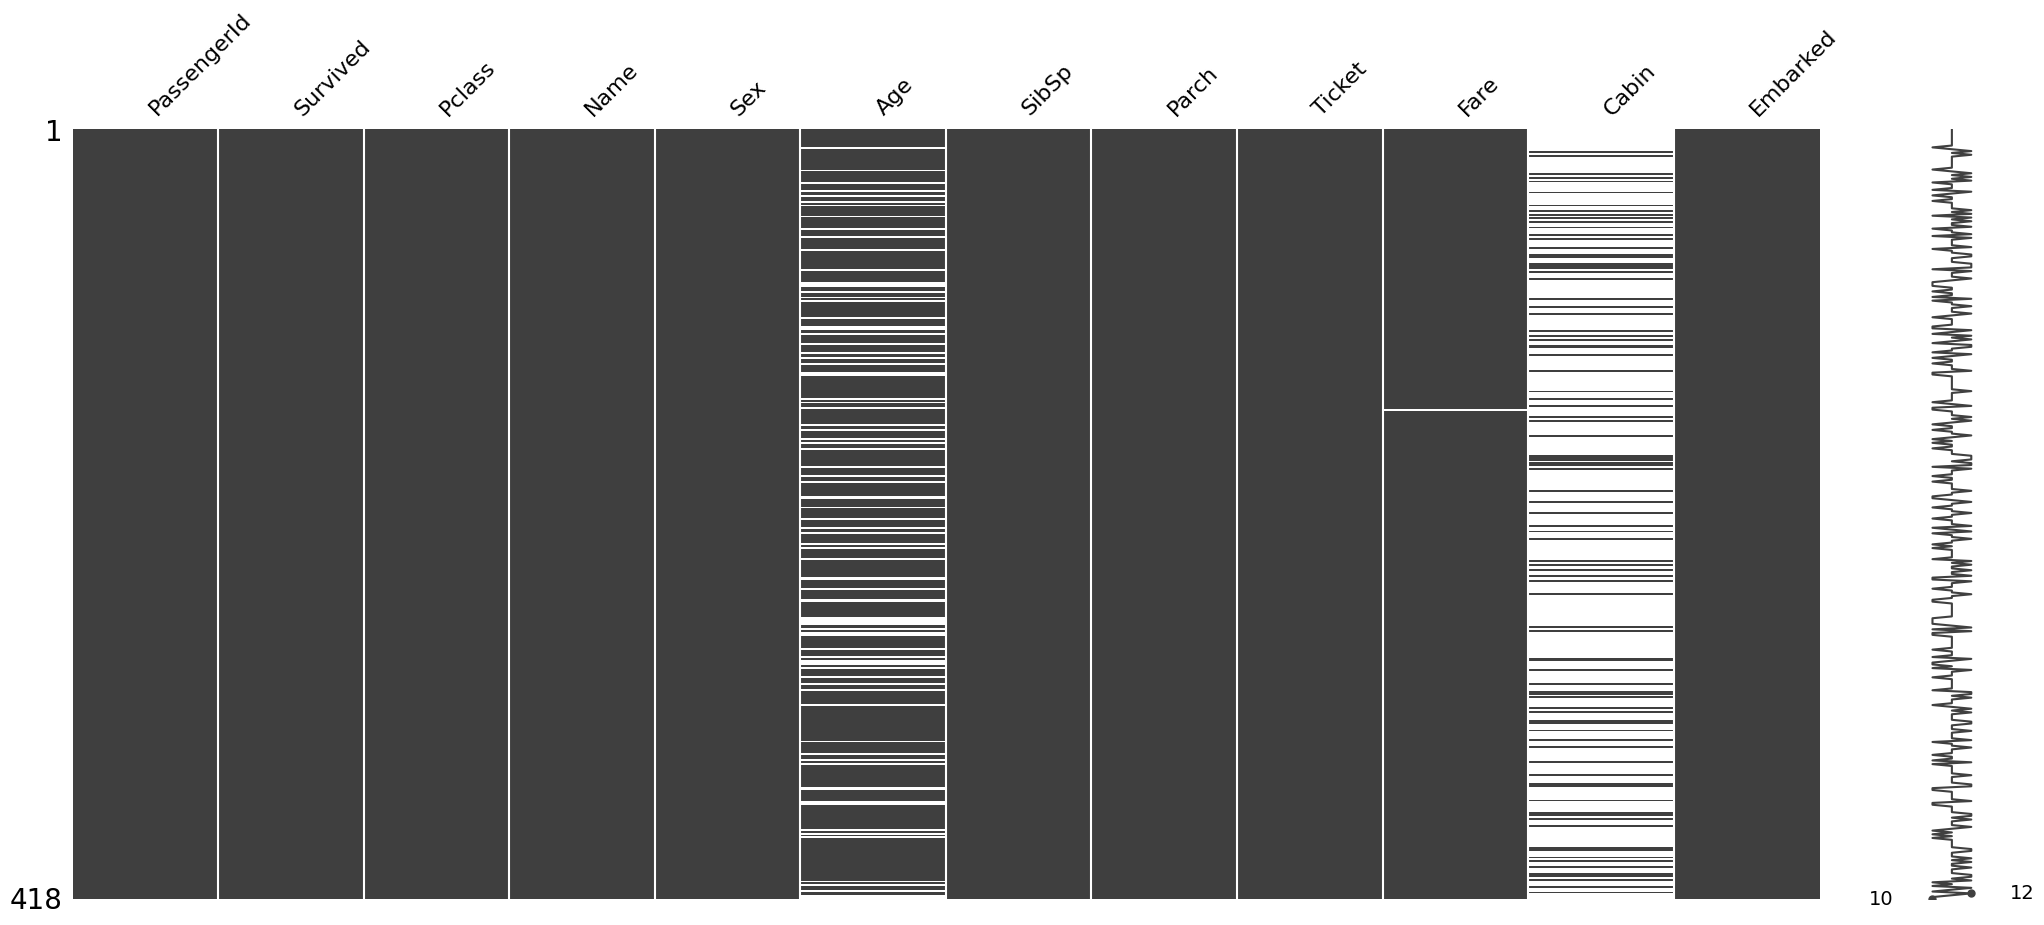

In [7]:
missingno.matrix(df)

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Data Cleaning and Preprocessing

### 1. Handling Missing Data
    Handle missing data: Fill in missing values or remove rows/columns with too many missing values.
    A. Removing Rows or Columns -
        If the missing data is minimal, you may choose to remove rows or columns containing missing values.
    B.Imputation:
        Imputation involves filling in the missing values with estimated or calculated values. Some popular imputation methods include:
        Mean, median, or mode imputation
        Forward fill or backward fill 
    C. Using Predictive Models
    D. Creating an Indicator Variable

In [10]:
# Missing Data in columns Fare and Age is filled by mean .
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [12]:
# Dropping column Cabin.
df = df.drop(columns='Cabin')

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [16]:
# Dropping column Name .
df = df.drop(columns='Name')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


In [18]:
df['Ticket'].value_counts()

Ticket
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: count, Length: 363, dtype: int64

In [19]:
# Dropping column Ticket
df = df.drop(columns='Ticket')

### 2. Convert categorical variables into numerical representations
    Converting categorical variables into numerical representation is a common data preprocessing step in machine learning and data analysis. There are several techniques to achieve this, and the choice of method depends on the nature of the categorical variables and the specific requirements of your analysis.
    Here we use ordinal encoding(custom mapping) .

In [20]:
df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [21]:
#Ordinal Encoding(Custom Mapping)
#For ordinal categorical variables, you can manually define a custom mapping of category values to their corresponding numeric representations.
# Female and Male is represented by 1 and 0 respectively .
mapping = {
    'female' : 1 ,
    'male' : 0 
}
df['Sex'] = df['Sex'].map(mapping)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,0,34.5,0,0,7.8292,Q
1,893,1,3,1,47.0,1,0,7.0000,S
2,894,0,2,0,62.0,0,0,9.6875,Q
3,895,0,3,0,27.0,0,0,8.6625,S
4,896,1,3,1,22.0,1,1,12.2875,S


In [23]:
df['Sex'].value_counts()

Sex
0    266
1    152
Name: count, dtype: int64

In [24]:
df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [25]:
# Embarked S,C and Q is represented by 1,2 and 3 repectively .
mapping = {
    'S' : 1 ,
    'C' : 2 ,
    'Q' :3
}
df['Embarked'] = df['Embarked'].map(mapping)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


##  Feature Engineering 
    Feature engineering is the process of transforming raw data into meaningful features that can be used as inputs for machine learning algorithms. It involves selecting, creating, and transforming features to improve the performance of machine learning models and make them more effective in solving a particular problem.
    Create new features that might have predictive power.Good feature engineering can significantly impact the accuracy and robustness of a model.

In [27]:
# importing libraries .
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [29]:
corr_matrix = df.corr()

In [30]:
# calculate correlation between Survived and other column.
corr_matrix['Survived'].sort_values(ascending = False)

Survived       1.000000
Sex            1.000000
Fare           0.191382
Parch          0.159120
Embarked       0.126779
SibSp          0.099943
Age           -0.000011
PassengerId   -0.023245
Pclass        -0.108615
Name: Survived, dtype: float64

array([[<Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Sex', ylabel='Survived'>,
        <Axes: xlabel='Pclass', ylabel='Survived'>,
        <Axes: xlabel='Age', ylabel='Survived'>],
       [<Axes: xlabel='Survived', ylabel='Sex'>,
        <Axes: xlabel='Sex', ylabel='Sex'>,
        <Axes: xlabel='Pclass', ylabel='Sex'>,
        <Axes: xlabel='Age', ylabel='Sex'>],
       [<Axes: xlabel='Survived', ylabel='Pclass'>,
        <Axes: xlabel='Sex', ylabel='Pclass'>,
        <Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='Age', ylabel='Pclass'>],
       [<Axes: xlabel='Survived', ylabel='Age'>,
        <Axes: xlabel='Sex', ylabel='Age'>,
        <Axes: xlabel='Pclass', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>]], dtype=object)

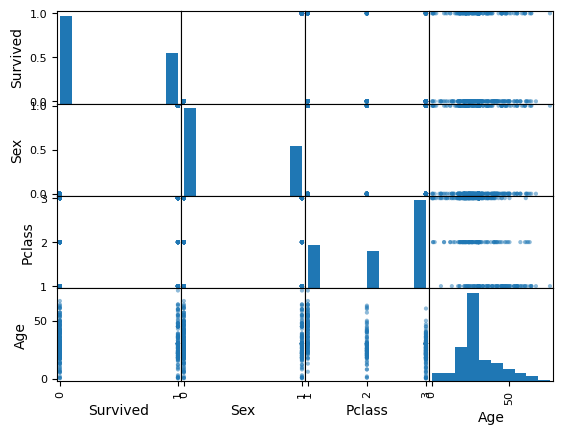

In [31]:
attributes = ['Survived','Sex','Pclass','Age']
scatter_matrix(df[attributes])

<Axes: xlabel='Survived', ylabel='Sex'>

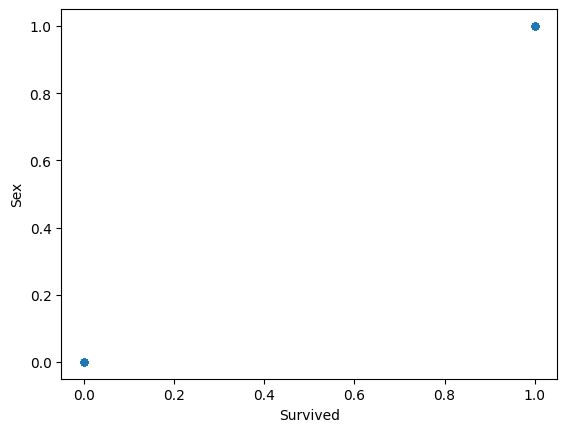

In [32]:
# finding out the relation between Survived and Sex .
# Ploting scatter graph.
df.plot(kind = "scatter" ,x='Survived',y='Sex')

In [33]:
df[['Sex','Survived']].groupby('Sex',as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
1,1,1.0
0,0,0.0


Text(0.5, 1.0, 'Survival Probability by Gender')

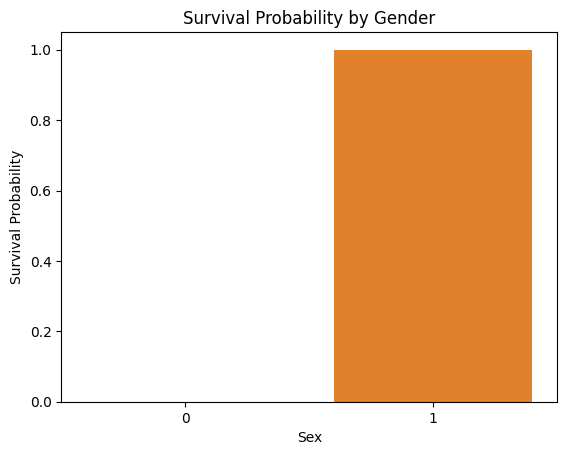

In [34]:
# plotting bar graph
sns.barplot(x='Sex',y='Survived',data=df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

## Splitting Data into train-test dataset
    Split the dataset into a training set and a testing set to evaluate the model's performance on unseen data.The training dataset is used to train the model, while the testing dataset is used to evaluate how well the model generalizes to unseen data.
    There are several methods for doing so . Some of them are -
    
    1.Holdout Method (Simple Train-Test Split):
        Description: The dataset is split into two subsets: a training set and a testing set. Typically, a fixed percentage (e.g., 70% training and 30% testing) of the data is used for each set.
        Implementation: Use train_test_split() function from Scikit-learn with test_size parameter.
        
    2.K-Fold Cross-Validation:
        Description: The dataset is divided into k subsets (folds), and the model is trained and evaluated k times. In each iteration, one of the folds is used as the testing set, while the rest are used for training.
        Implementation: Use KFold or StratifiedKFold classes from Scikit-learn.
        
    3.Stratified Sampling:
        Description: This technique ensures that the class distribution in the training and testing datasets remains consistent with the original dataset. It is particularly useful for imbalanced datasets where some classes have a much smaller representation.
        Implementation: Use train_test_split() function with stratify parameter or StratifiedKFold from Scikit-learn.
        
    4.Shuffle and Split:
        Description: This method shuffles the data and then splits it into training and testing sets, often useful for large datasets.
        Implementation: Use ShuffleSplit or StratifiedShuffleSplit from Scikit-learn.
    
    And so on.......

In [35]:
#importing libraries.
from sklearn.model_selection import train_test_split

In [36]:
# Here we use Holdout Method
X = df[['Sex','Fare','Parch','Embarked','SibSp','Age','PassengerId','Pclass']]
Y = df['Survived']
X_train , X_test ,Y_train , Y_test =train_test_split(X,Y, test_size=0.2 , train_size=0.8, random_state=0)

In [37]:
X_train

,Sex,Fare,Parch,Embarked,SibSp,Age,PassengerId,Pclass
20,0,59.4000,0,2,1,55.00000,912,1
306,0,151.5500,2,1,1,30.00000,1198,1
142,0,262.3750,3,2,1,61.00000,1034,1
14,1,61.1750,0,1,1,47.00000,906,1
284,1,20.2125,1,1,1,2.00000,1176,3
...,...,...,...,...,...,...,...,...
323,0,26.5500,0,1,0,33.00000,1215,1
192,0,14.5000,1,1,1,11.50000,1084,3
117,1,16.7000,1,1,1,1.00000,1009,3
47,0,7.7500,0,3,0,30.27259,939,3


In [38]:
Y_train

20     0
306    0
142    0
14     1
284    1
      ..
323    0
192    0
117    1
47     0
172    0
Name: Survived, Length: 334, dtype: int64

In [39]:
X_test

,Sex,Fare,Parch,Embarked,SibSp,Age,PassengerId,Pclass
360,0,69.5500,2,1,8,14.50000,1252,3
170,0,7.5500,0,1,0,30.27259,1062,3
224,1,27.4458,0,2,0,53.00000,1116,1
358,0,7.7500,0,3,0,30.27259,1250,3
309,1,14.1083,0,1,1,45.00000,1201,3
...,...,...,...,...,...,...,...,...
100,1,55.4417,0,2,1,43.00000,992,1
7,0,29.0000,1,1,1,26.00000,899,2
22,1,31.6833,0,1,0,30.27259,914,1
68,0,28.5375,0,2,0,31.00000,960,1


In [40]:
Y_test

360    0
170    0
224    1
358    0
309    1
      ..
100    1
7      0
22     1
68     0
328    0
Name: Survived, Length: 84, dtype: int64

In [41]:
train = pd.concat([X_train,Y_train],axis = 1)

In [42]:
train.head()

,Sex,Fare,Parch,Embarked,SibSp,Age,PassengerId,Pclass,Survived
20,0,59.4000,0,2,1,55.0,912,1,0
306,0,151.5500,2,1,1,30.0,1198,1,0
142,0,262.3750,3,2,1,61.0,1034,1,0
14,1,61.1750,0,1,1,47.0,906,1,1
284,1,20.2125,1,1,1,2.0,1176,3,1


In [43]:
test = X_test # we shoudnot wanted to combine the survived column in test data .

In [44]:
test.head()

,Sex,Fare,Parch,Embarked,SibSp,Age,PassengerId,Pclass
360,0,69.5500,2,1,8,14.50000,1252,3
170,0,7.5500,0,1,0,30.27259,1062,3
224,1,27.4458,0,2,0,53.00000,1116,1
358,0,7.7500,0,3,0,30.27259,1250,3
309,1,14.1083,0,1,1,45.00000,1201,3


In [45]:
train['Survived'].value_counts()

Survived
0    221
1    113
Name: count, dtype: int64

In [46]:
221/334

0.6616766467065869

In [47]:
Y_test.value_counts()

Survived
0    45
1    39
Name: count, dtype: int64

In [48]:
45/84

0.5357142857142857

In [49]:
# There is one columns less in test dataset than train dataset .
#This is because Survived is our response variable, or sometimes called a target variable. Our job is to analyse the data in the training set and predict the survival of the passengers in the test set.

## Select a Model 
    Choose an appropriate machine learning algorithm .Selecting the right model is a critical step in the machine learning workflow, as the choice of model can significantly impact the performance and effectiveness of your predictions. There is no one-size-fits-all approach to model selection, and the best method depends on the nature of your data, the problem you are trying to solve, and the specific objectives of your analysis. Here are some common methods of selecting a model:
    
    1.Exploratory Data Analysis (EDA):
        Perform exploratory data analysis to gain insights into the data, understand the relationships between features and the target variable, and identify potential patterns or trends that can guide model selection.
        
    2.Hyperparameter Tuning:
        Fine-tune the hyperparameters of your models to optimize their performance. Grid search or random search can be used to explore different hyperparameter combinations.
        
    3.Train and Evaluate Multiple Models:
        Train and evaluate different types of models on your dataset. This can include linear models, tree-based models, support vector machines, neural networks, etc. Assess each model's performance using appropriate evaluation metrics and cross-validation techniques.

In [50]:
#importing libraies
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

### Categorical variable

In [51]:
#Sex
train['Sex'].value_counts(dropna = False)

Sex
0    221
1    113
Name: count, dtype: int64

In [52]:
train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
1,1,1.0
0,0,0.0


Text(0.5, 1.0, 'Survival Probability by Gender')

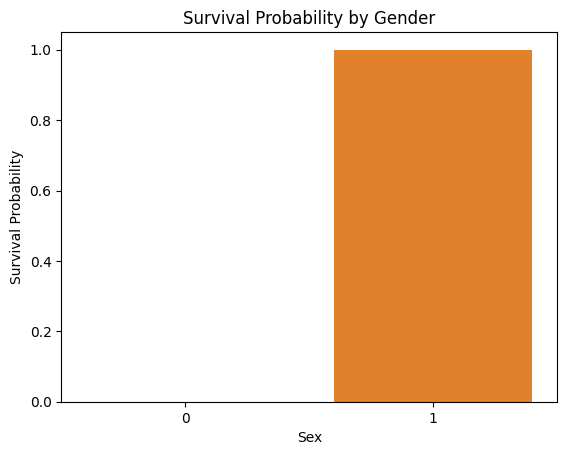

In [53]:
sns.barplot(x = 'Sex', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

In [54]:
#Pclass
train['Pclass'].value_counts(dropna = False)

Pclass
3    177
1     87
2     70
Name: count, dtype: int64

In [55]:
train[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.402299
2,3,0.316384
1,2,0.314286


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

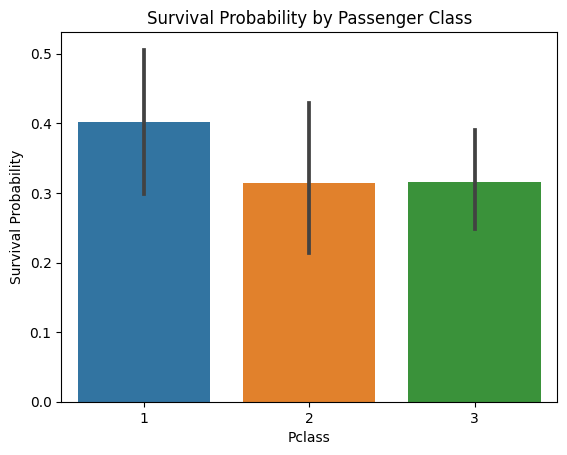

In [56]:
sns.barplot(x = 'Pclass', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

In [57]:
#Embarked
train['Embarked'].value_counts(dropna = False)

Embarked
1    215
2     80
3     39
Name: count, dtype: int64

In [58]:
train[['Embarked', 'Survived']].groupby('Embarked', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
2,3,0.538462
0,1,0.316279
1,2,0.300000


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

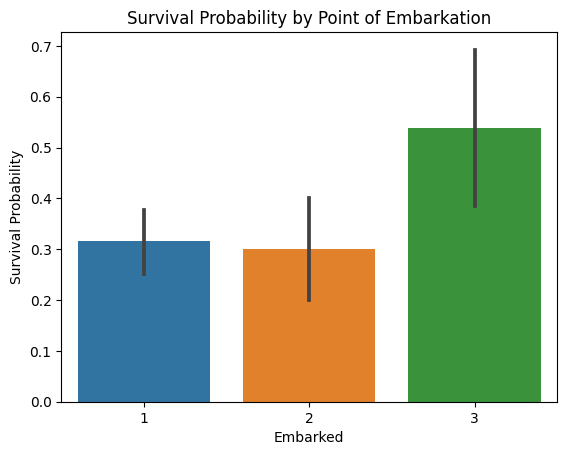

In [59]:
sns.barplot(x = 'Embarked', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

### Numerical variables
    Numerical variables in our dataset are SibSp, Parch, Age and Fare.

#### Detect and remove outliers in numerical variables
    Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions. I will use the Tukey method to remove these outliers.

In [60]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 5 indices:  [142, 217, 343, 69, 53]


In [61]:
train.loc[outliers_to_drop, :]

,Sex,Fare,Parch,Embarked,SibSp,Age,PassengerId,Pclass,Survived
142,0,262.3750,3,2,1,61.0,1034,1,0
217,0,164.8667,1,1,1,57.0,1109,1,0
343,1,512.3292,1,2,0,58.0,1235,1,1
69,1,263.0000,4,1,1,60.0,961,1,1
53,1,263.0000,2,1,3,28.0,945,1,1


In [62]:
print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 334 rows
After: 329 rows


#### Numerical variables correlation with survival

<Axes: >

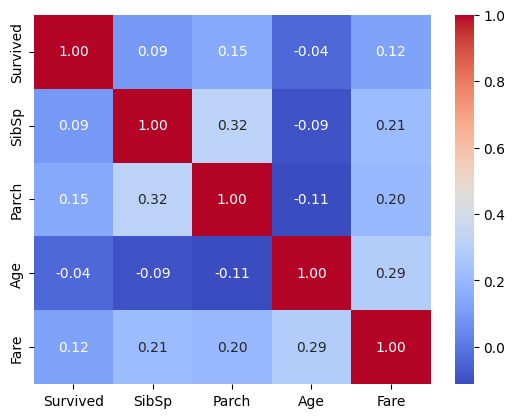

In [63]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

#### Numerical variable: SibSp

In [64]:
train['SibSp'].value_counts(dropna = False)

SibSp
0    223
1     87
2     12
4      4
3      2
5      1
Name: count, dtype: int64

In [65]:
train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
5,5,1.000000
1,1,0.459770
2,2,0.333333
0,0,0.286996
4,4,0.250000
3,3,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

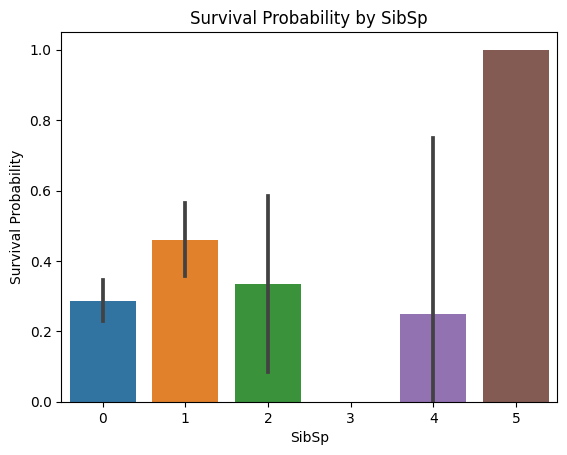

In [66]:
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

#### Numerical variable: Parch

In [67]:
train['Parch'].value_counts(dropna = False)

Parch
0    257
1     39
2     27
9      2
3      2
6      1
5      1
Name: count, dtype: int64

In [68]:
train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,1.000000
2,2,0.555556
1,1,0.538462
6,9,0.500000
0,0,0.276265
4,5,0.000000
5,6,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

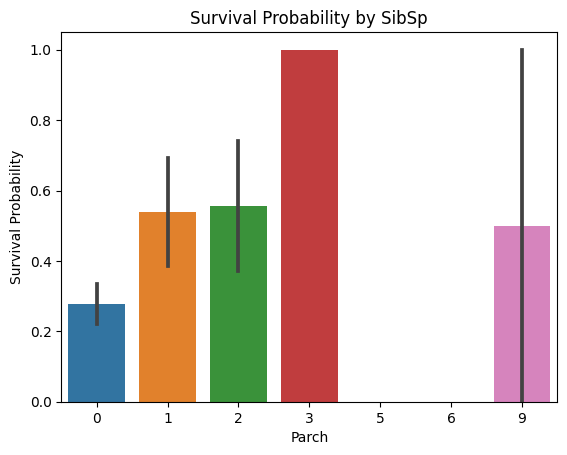

In [69]:
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

#### Numerical variable: Age

In [70]:
train['Age'].isnull().sum()

0

C:\Users\PoojaRoy\AppData\Local\Temp\ipykernel_8620\3118913774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))


Text(0.5, 1.0, 'Passenger Age Distribution')

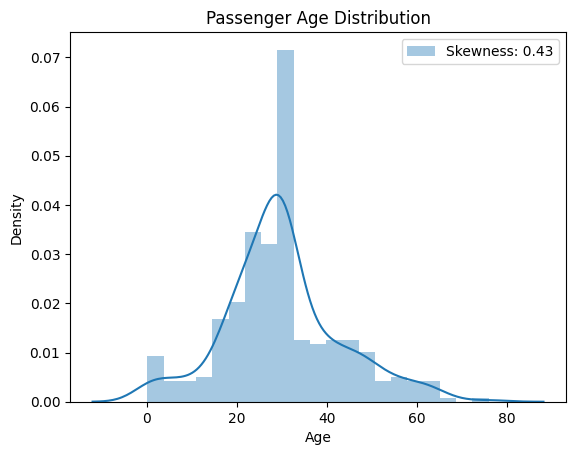

In [71]:
sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

C:\Users\PoojaRoy\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\PoojaRoy\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

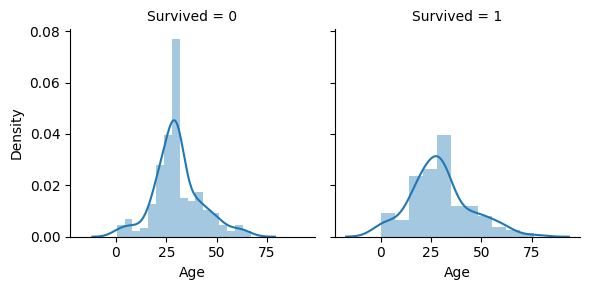

In [72]:
g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

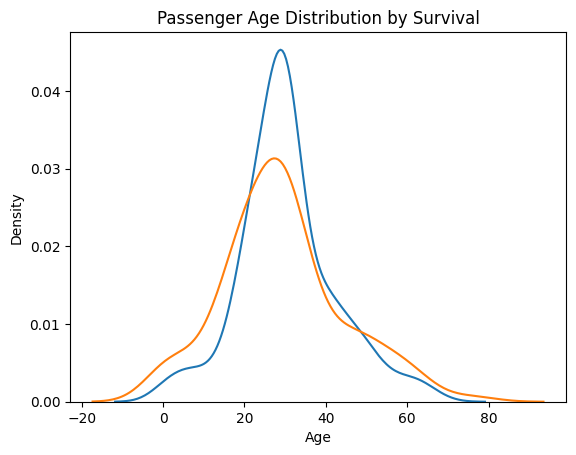

In [73]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

#### Numerical variable: Fare

In [74]:
train['Fare'].isnull().sum()

0

C:\Users\PoojaRoy\AppData\Local\Temp\ipykernel_8620\2892669789.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))


Text(0, 0.5, 'Passenger Fare Distribution')

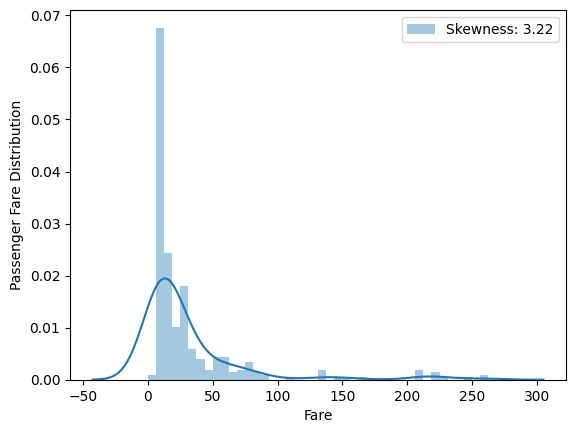

In [75]:
sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

In [76]:
df['Fare'] = df['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

C:\Users\PoojaRoy\AppData\Local\Temp\ipykernel_8620\1183373296.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'], label = 'Skewness: %.2f'%(df['Fare'].skew()))


Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

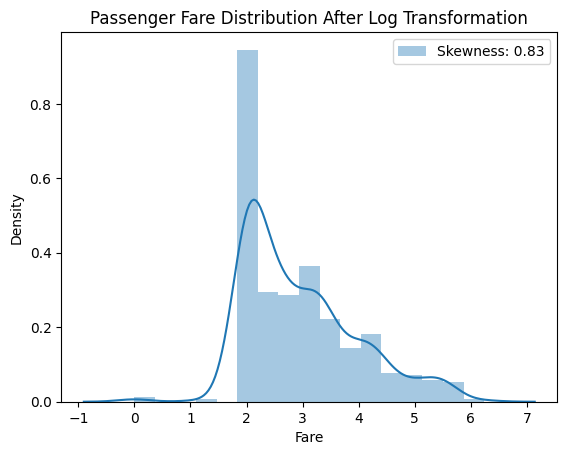

In [77]:
sns.distplot(df['Fare'], label = 'Skewness: %.2f'%(df['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

In [78]:
train = train.drop('PassengerId', axis = 1)
train.head()

,Sex,Fare,Parch,Embarked,SibSp,Age,Pclass,Survived
0,0,59.4000,0,2,1,55.00000,1,0
1,0,151.5500,2,1,1,30.00000,1,0
2,1,61.1750,0,1,1,47.00000,1,1
3,1,20.2125,1,1,1,2.00000,3,1
4,0,7.7500,0,3,0,30.27259,3,0


## Model Training
    Model training is the process of using a machine learning algorithm to learn from the training data and develop a predictive model. There are various methods and techniques involved in model training, depending on the type of machine learning algorithm and the problem being solved. 
    Here are some common methods of model training:
    
    1.Supervised Learning:
        In supervised learning, the algorithm is trained on a labeled dataset where the input features and their corresponding target labels are known. Common methods for supervised learning include:
        A.Linear Regression:
            Linear regression models the relationship between the input features and the numeric target variable by fitting a linear equation. It is used for regression tasks.
        B.Logistic Regression:
            Logistic regression is used for binary classification problems, where the target variable has two classes. It models the probability of the target belonging to a certain class using a logistic function.
        C.Decision Trees:
            Decision trees recursively split the data into subsets based on feature values to make classification decisions. They can be used for both classification and regression tasks.
        D.Random Forest:
            Random Forest is an ensemble method that combines multiple decision trees to improve performance and handle complex datasets.
        E.K-Nearest Neighbors (KNN):
            KNN classifies data points based on the majority class of their k-nearest neighbors in the feature space.
        F.Naive Bayes:
            Naive Bayes classifiers are probabilistic models based on Bayes' theorem. They are often used for text classification and other simple classification tasks.
        G.Perceptron:
            The perceptron is a simple linear classifier used for binary classification tasks.
        H.Support Vector Machines (SVM):
            SVM is a powerful algorithm for binary and multiclass classification tasks. It finds the optimal hyperplane that separates classes with the maximum margin.
        I.Gradient Boosting:
            Gradient boosting algorithms, such as XGBoost,LightGBM and CatBoost , are ensemble methods that iteratively train weak learners to correct errors made by previous learners.
            
    2.Unsupervised Learning:
        In unsupervised learning, the algorithm is trained on an unlabeled dataset, and it attempts to find patterns, structures, or representations within the data. 
        Common methods for unsupervised learning include:
        A.K-Means Clustering: 
            Group data into k clusters based on similarity.
        B.Principal Component Analysis (PCA): 
            Reduce the dimensionality of the data by finding orthogonal components capturing most variance.
            
    3.Reinforcement Learning:
        In reinforcement learning, the model learns by interacting with an environment and receiving feedback in the form of rewards or penalties. 
        Common methods for reinforcement learning include:
        A.Q-Learning: 
            Update action-values based on the reward signal and the expected future rewards.

In [79]:
#importing libraries
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

In [80]:
X_train.head()

,Sex,Fare,Parch,Embarked,SibSp,Age,PassengerId,Pclass
20,0,59.4000,0,2,1,55.0,912,1
306,0,151.5500,2,1,1,30.0,1198,1
142,0,262.3750,3,2,1,61.0,1034,1
14,1,61.1750,0,1,1,47.0,906,1
284,1,20.2125,1,1,1,2.0,1176,3


In [81]:
Y_train.head()

20     0
306    0
142    0
14     1
284    1
Name: Survived, dtype: int64

In [82]:
X_test.head()

,Sex,Fare,Parch,Embarked,SibSp,Age,PassengerId,Pclass
360,0,69.5500,2,1,8,14.50000,1252,3
170,0,7.5500,0,1,0,30.27259,1062,3
224,1,27.4458,0,2,0,53.00000,1116,1
358,0,7.7500,0,3,0,30.27259,1250,3
309,1,14.1083,0,1,1,45.00000,1201,3


In [83]:
Y_test.head()

360    0
170    0
224    1
358    0
309    1
Name: Survived, dtype: int64

### Logistic Regression 

In [84]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\PoojaRoy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


100.0

### Support Vector Machine

In [85]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

66.17

### LinearSVC

In [86]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\PoojaRoy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\PoojaRoy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


66.47

### K-Nearest Neighbors (KNN)

In [87]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

76.35

### Naive Bayes

In [88]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

100.0

### Perceptron

In [89]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

33.83

### Stochastic gradient descent

In [90]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

66.47

### Decision tree

In [91]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

### Random forest

In [92]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

### CatBoost

In [93]:
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)

Learning rate set to 0.00645
0:	learn: 0.6742976	total: 149ms	remaining: 2m 28s
1:	learn: 0.6599830	total: 159ms	remaining: 1m 19s
2:	learn: 0.6456209	total: 165ms	remaining: 54.9s
3:	learn: 0.6312796	total: 174ms	remaining: 43.2s
4:	learn: 0.6165525	total: 181ms	remaining: 36.1s
5:	learn: 0.6043299	total: 188ms	remaining: 31.1s
6:	learn: 0.5886898	total: 192ms	remaining: 27.2s
7:	learn: 0.5776660	total: 200ms	remaining: 24.7s
8:	learn: 0.5650701	total: 205ms	remaining: 22.5s
9:	learn: 0.5511339	total: 208ms	remaining: 20.6s
10:	learn: 0.5409910	total: 213ms	remaining: 19.2s
11:	learn: 0.5284374	total: 217ms	remaining: 17.9s
12:	learn: 0.5186278	total: 222ms	remaining: 16.8s
13:	learn: 0.5077249	total: 227ms	remaining: 16s
14:	learn: 0.4945813	total: 230ms	remaining: 15.1s
15:	learn: 0.4826910	total: 234ms	remaining: 14.4s
16:	learn: 0.4697446	total: 236ms	remaining: 13.7s
17:	learn: 0.4574961	total: 238ms	remaining: 13s
18:	learn: 0.4460529	total: 240ms	remaining: 12.4s
19:	learn: 0.4

187:	learn: 0.0269118	total: 785ms	remaining: 3.39s
188:	learn: 0.0264691	total: 787ms	remaining: 3.38s
189:	learn: 0.0260359	total: 790ms	remaining: 3.37s
190:	learn: 0.0259210	total: 794ms	remaining: 3.36s
191:	learn: 0.0256681	total: 799ms	remaining: 3.36s
192:	learn: 0.0254419	total: 804ms	remaining: 3.36s
193:	learn: 0.0251651	total: 807ms	remaining: 3.35s
194:	learn: 0.0249599	total: 811ms	remaining: 3.35s
195:	learn: 0.0247134	total: 813ms	remaining: 3.33s
196:	learn: 0.0245575	total: 816ms	remaining: 3.33s
197:	learn: 0.0243221	total: 819ms	remaining: 3.32s
198:	learn: 0.0240216	total: 821ms	remaining: 3.3s
199:	learn: 0.0238594	total: 824ms	remaining: 3.29s
200:	learn: 0.0235825	total: 826ms	remaining: 3.28s
201:	learn: 0.0233700	total: 828ms	remaining: 3.27s
202:	learn: 0.0231075	total: 830ms	remaining: 3.26s
203:	learn: 0.0229798	total: 832ms	remaining: 3.25s
204:	learn: 0.0226189	total: 835ms	remaining: 3.24s
205:	learn: 0.0223472	total: 838ms	remaining: 3.23s
206:	learn: 0

405:	learn: 0.0057156	total: 1.57s	remaining: 2.29s
406:	learn: 0.0056899	total: 1.57s	remaining: 2.29s
407:	learn: 0.0056812	total: 1.57s	remaining: 2.29s
408:	learn: 0.0056474	total: 1.58s	remaining: 2.28s
409:	learn: 0.0056374	total: 1.58s	remaining: 2.28s
410:	learn: 0.0055884	total: 1.58s	remaining: 2.27s
411:	learn: 0.0055399	total: 1.58s	remaining: 2.26s
412:	learn: 0.0054920	total: 1.59s	remaining: 2.25s
413:	learn: 0.0054844	total: 1.59s	remaining: 2.25s
414:	learn: 0.0054606	total: 1.59s	remaining: 2.24s
415:	learn: 0.0054479	total: 1.59s	remaining: 2.24s
416:	learn: 0.0054381	total: 1.6s	remaining: 2.23s
417:	learn: 0.0054201	total: 1.6s	remaining: 2.23s
418:	learn: 0.0053737	total: 1.6s	remaining: 2.22s
419:	learn: 0.0053407	total: 1.6s	remaining: 2.21s
420:	learn: 0.0053097	total: 1.6s	remaining: 2.21s
421:	learn: 0.0052807	total: 1.61s	remaining: 2.2s
422:	learn: 0.0052529	total: 1.61s	remaining: 2.2s
423:	learn: 0.0052393	total: 1.61s	remaining: 2.19s
424:	learn: 0.00522

577:	learn: 0.0030451	total: 2.14s	remaining: 1.57s
578:	learn: 0.0030401	total: 2.15s	remaining: 1.56s
579:	learn: 0.0030325	total: 2.15s	remaining: 1.56s
580:	learn: 0.0030293	total: 2.16s	remaining: 1.56s
581:	learn: 0.0030182	total: 2.16s	remaining: 1.55s
582:	learn: 0.0030127	total: 2.17s	remaining: 1.55s
583:	learn: 0.0030090	total: 2.17s	remaining: 1.54s
584:	learn: 0.0030026	total: 2.17s	remaining: 1.54s
585:	learn: 0.0029925	total: 2.17s	remaining: 1.54s
586:	learn: 0.0029833	total: 2.18s	remaining: 1.53s
587:	learn: 0.0029768	total: 2.18s	remaining: 1.53s
588:	learn: 0.0029679	total: 2.19s	remaining: 1.53s
589:	learn: 0.0029618	total: 2.19s	remaining: 1.52s
590:	learn: 0.0029592	total: 2.19s	remaining: 1.52s
591:	learn: 0.0029553	total: 2.2s	remaining: 1.51s
592:	learn: 0.0029442	total: 2.2s	remaining: 1.51s
593:	learn: 0.0029396	total: 2.2s	remaining: 1.51s
594:	learn: 0.0029220	total: 2.21s	remaining: 1.5s
595:	learn: 0.0029166	total: 2.21s	remaining: 1.5s
596:	learn: 0.002

760:	learn: 0.0020720	total: 2.7s	remaining: 849ms
761:	learn: 0.0020697	total: 2.71s	remaining: 846ms
762:	learn: 0.0020678	total: 2.71s	remaining: 842ms
763:	learn: 0.0020658	total: 2.71s	remaining: 838ms
764:	learn: 0.0020648	total: 2.72s	remaining: 835ms
765:	learn: 0.0020628	total: 2.72s	remaining: 831ms
766:	learn: 0.0020557	total: 2.72s	remaining: 827ms
767:	learn: 0.0020527	total: 2.72s	remaining: 823ms
768:	learn: 0.0020500	total: 2.73s	remaining: 819ms
769:	learn: 0.0020440	total: 2.73s	remaining: 815ms
770:	learn: 0.0020425	total: 2.73s	remaining: 811ms
771:	learn: 0.0020396	total: 2.73s	remaining: 807ms
772:	learn: 0.0020376	total: 2.74s	remaining: 804ms
773:	learn: 0.0020354	total: 2.74s	remaining: 800ms
774:	learn: 0.0020302	total: 2.74s	remaining: 796ms
775:	learn: 0.0020206	total: 2.74s	remaining: 792ms
776:	learn: 0.0020181	total: 2.75s	remaining: 788ms
777:	learn: 0.0020160	total: 2.75s	remaining: 784ms
778:	learn: 0.0020109	total: 2.75s	remaining: 781ms
779:	learn: 0

969:	learn: 0.0015218	total: 3.51s	remaining: 109ms
970:	learn: 0.0015192	total: 3.52s	remaining: 105ms
971:	learn: 0.0015174	total: 3.52s	remaining: 101ms
972:	learn: 0.0015166	total: 3.52s	remaining: 97.8ms
973:	learn: 0.0015135	total: 3.53s	remaining: 94.2ms
974:	learn: 0.0015124	total: 3.53s	remaining: 90.6ms
975:	learn: 0.0015100	total: 3.53s	remaining: 86.9ms
976:	learn: 0.0015084	total: 3.54s	remaining: 83.3ms
977:	learn: 0.0015071	total: 3.54s	remaining: 79.6ms
978:	learn: 0.0015054	total: 3.54s	remaining: 76ms
979:	learn: 0.0015037	total: 3.54s	remaining: 72.3ms
980:	learn: 0.0015007	total: 3.55s	remaining: 68.7ms
981:	learn: 0.0015000	total: 3.55s	remaining: 65.1ms
982:	learn: 0.0014990	total: 3.55s	remaining: 61.4ms
983:	learn: 0.0014982	total: 3.55s	remaining: 57.8ms
984:	learn: 0.0014953	total: 3.56s	remaining: 54.2ms
985:	learn: 0.0014941	total: 3.56s	remaining: 50.6ms
986:	learn: 0.0014933	total: 3.56s	remaining: 46.9ms
987:	learn: 0.0014922	total: 3.57s	remaining: 43.3m

In [94]:
acc_catboost

100.0

## Model Evaluation
    It involves various techniques to measure the model's predictive accuracy and generalization capabilities.Model evaluation helps identify model weaknesses, overfitting, underfitting, and areas for improvement.Some common methods of model evaluation include:
    
    1.Evaluation Metrics:
        Various evaluation metrics are used based on the type of problem (classification, regression, etc.). For example, accuracy, precision, recall, F1-score, and ROC-AUC for classification tasks, and mean absolute error (MAE) or root mean squared error (RMSE) for regression tasks.
        
    2.Cross-Validation:
        K-Fold Cross-Validation involves dividing the dataset into k subsets (folds). The model is trained and tested k times, with each fold used as the testing set once. This method provides a more robust estimate of the model's performance.
        
    3.Confusion Matrix:
        In classification, the confusion matrix shows the true positives, true negatives, false positives, and false negatives, providing a detailed view of the model's performance.
        
    4.Receiver Operating Characteristic (ROC) Curve:
        ROC curves plot the true positive rate (sensitivity) against the false positive rate (1-specificity) at different probability thresholds for binary classification problems.
        
    5.Precision-Recall Curve:
        Precision-recall curves illustrate the trade-off between precision and recall at different probability thresholds for binary classification.
        
    6.Area Under the Curve (AUC):
        AUC represents the overall performance of a model in binary classification and provides a single scalar value for comparison.
        
    7.Mean Squared Error (MSE) or R-squared (R2):
        Used for assessing the performance of regression models.
        
    8.Grid Search and Hyperparameter Tuning:
        Evaluating different hyperparameter combinations to find the best model configuration.

### Training accuracy

In [95]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Logistic Regression,100.00
1,Random Forest,100.00
2,Naive Bayes,100.00
3,Decision Tree,100.00
4,CatBoost,100.00
5,KNN,76.35
6,Stochastic Gradient Decent,66.47
7,Linear SVC,66.47
8,Support Vector Machines,66.17
9,Perceptron,33.83


### K-fold cross validation

In [96]:
#importing libraries
from sklearn.model_selection import cross_val_score

In [97]:
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [98]:
# Create a list which contains cross validation results for each classifier
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

C:\Users\PoojaRoy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PoojaRoy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

C:\Users\PoojaRoy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\PoojaRoy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\PoojaRoy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\PoojaRoy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\PoojaRoy\AppData\Local\Programs\Python\Python

Learning rate set to 0.006161
0:	learn: 0.6754208	total: 2.66ms	remaining: 2.66s
1:	learn: 0.6618978	total: 8.74ms	remaining: 4.36s
2:	learn: 0.6484033	total: 11.7ms	remaining: 3.9s
3:	learn: 0.6349077	total: 15.8ms	remaining: 3.94s
4:	learn: 0.6207578	total: 19.2ms	remaining: 3.81s
5:	learn: 0.6092326	total: 26.1ms	remaining: 4.32s
6:	learn: 0.5945162	total: 28.5ms	remaining: 4.05s
7:	learn: 0.5840430	total: 32.6ms	remaining: 4.04s
8:	learn: 0.5733278	total: 38.7ms	remaining: 4.26s
9:	learn: 0.5600566	total: 42.2ms	remaining: 4.17s
10:	learn: 0.5499319	total: 46.4ms	remaining: 4.17s
11:	learn: 0.5390098	total: 49.5ms	remaining: 4.08s
12:	learn: 0.5296810	total: 54.8ms	remaining: 4.16s
13:	learn: 0.5192411	total: 58.4ms	remaining: 4.12s
14:	learn: 0.5066071	total: 61.1ms	remaining: 4.01s
15:	learn: 0.4951858	total: 64.6ms	remaining: 3.97s
16:	learn: 0.4826330	total: 67.3ms	remaining: 3.89s
17:	learn: 0.4708665	total: 70.2ms	remaining: 3.83s
18:	learn: 0.4596878	total: 72.8ms	remaining:

178:	learn: 0.0352159	total: 560ms	remaining: 2.57s
179:	learn: 0.0348834	total: 563ms	remaining: 2.57s
180:	learn: 0.0346098	total: 566ms	remaining: 2.56s
181:	learn: 0.0341565	total: 569ms	remaining: 2.56s
182:	learn: 0.0335967	total: 572ms	remaining: 2.55s
183:	learn: 0.0330534	total: 574ms	remaining: 2.54s
184:	learn: 0.0327174	total: 576ms	remaining: 2.54s
185:	learn: 0.0321881	total: 578ms	remaining: 2.53s
186:	learn: 0.0318934	total: 581ms	remaining: 2.53s
187:	learn: 0.0313819	total: 582ms	remaining: 2.52s
188:	learn: 0.0308804	total: 584ms	remaining: 2.5s
189:	learn: 0.0307447	total: 587ms	remaining: 2.5s
190:	learn: 0.0304411	total: 590ms	remaining: 2.5s
191:	learn: 0.0301723	total: 592ms	remaining: 2.49s
192:	learn: 0.0298483	total: 595ms	remaining: 2.49s
193:	learn: 0.0296282	total: 598ms	remaining: 2.48s
194:	learn: 0.0293407	total: 600ms	remaining: 2.48s
195:	learn: 0.0291530	total: 604ms	remaining: 2.48s
196:	learn: 0.0288814	total: 607ms	remaining: 2.47s
197:	learn: 0.0

389:	learn: 0.0074489	total: 1.16s	remaining: 1.81s
390:	learn: 0.0073810	total: 1.16s	remaining: 1.8s
391:	learn: 0.0073605	total: 1.16s	remaining: 1.8s
392:	learn: 0.0073334	total: 1.17s	remaining: 1.8s
393:	learn: 0.0073087	total: 1.17s	remaining: 1.8s
394:	learn: 0.0072609	total: 1.17s	remaining: 1.8s
395:	learn: 0.0072257	total: 1.18s	remaining: 1.79s
396:	learn: 0.0072105	total: 1.18s	remaining: 1.79s
397:	learn: 0.0071762	total: 1.18s	remaining: 1.79s
398:	learn: 0.0071480	total: 1.18s	remaining: 1.78s
399:	learn: 0.0071324	total: 1.19s	remaining: 1.78s
400:	learn: 0.0070948	total: 1.19s	remaining: 1.78s
401:	learn: 0.0070506	total: 1.19s	remaining: 1.77s
402:	learn: 0.0069882	total: 1.19s	remaining: 1.77s
403:	learn: 0.0069474	total: 1.2s	remaining: 1.77s
404:	learn: 0.0069229	total: 1.21s	remaining: 1.77s
405:	learn: 0.0068808	total: 1.21s	remaining: 1.77s
406:	learn: 0.0068450	total: 1.21s	remaining: 1.77s
407:	learn: 0.0068294	total: 1.23s	remaining: 1.78s
408:	learn: 0.0068

551:	learn: 0.0040157	total: 1.73s	remaining: 1.41s
552:	learn: 0.0040116	total: 1.74s	remaining: 1.4s
553:	learn: 0.0040063	total: 1.74s	remaining: 1.4s
554:	learn: 0.0039956	total: 1.74s	remaining: 1.4s
555:	learn: 0.0039777	total: 1.74s	remaining: 1.39s
556:	learn: 0.0039518	total: 1.75s	remaining: 1.39s
557:	learn: 0.0039431	total: 1.75s	remaining: 1.38s
558:	learn: 0.0039262	total: 1.75s	remaining: 1.38s
559:	learn: 0.0039146	total: 1.75s	remaining: 1.38s
560:	learn: 0.0039099	total: 1.75s	remaining: 1.37s
561:	learn: 0.0038991	total: 1.76s	remaining: 1.37s
562:	learn: 0.0038788	total: 1.76s	remaining: 1.36s
563:	learn: 0.0038697	total: 1.76s	remaining: 1.36s
564:	learn: 0.0038638	total: 1.76s	remaining: 1.36s
565:	learn: 0.0038569	total: 1.77s	remaining: 1.35s
566:	learn: 0.0038531	total: 1.77s	remaining: 1.35s
567:	learn: 0.0038365	total: 1.77s	remaining: 1.35s
568:	learn: 0.0038121	total: 1.78s	remaining: 1.34s
569:	learn: 0.0038034	total: 1.78s	remaining: 1.34s
570:	learn: 0.0

755:	learn: 0.0024447	total: 2.32s	remaining: 750ms
756:	learn: 0.0024430	total: 2.33s	remaining: 747ms
757:	learn: 0.0024402	total: 2.33s	remaining: 744ms
758:	learn: 0.0024378	total: 2.33s	remaining: 741ms
759:	learn: 0.0024351	total: 2.33s	remaining: 738ms
760:	learn: 0.0024322	total: 2.34s	remaining: 735ms
761:	learn: 0.0024308	total: 2.34s	remaining: 732ms
762:	learn: 0.0024282	total: 2.34s	remaining: 728ms
763:	learn: 0.0024243	total: 2.35s	remaining: 725ms
764:	learn: 0.0024195	total: 2.35s	remaining: 722ms
765:	learn: 0.0024174	total: 2.35s	remaining: 718ms
766:	learn: 0.0024147	total: 2.35s	remaining: 715ms
767:	learn: 0.0024122	total: 2.36s	remaining: 712ms
768:	learn: 0.0024072	total: 2.36s	remaining: 709ms
769:	learn: 0.0024058	total: 2.36s	remaining: 705ms
770:	learn: 0.0023944	total: 2.36s	remaining: 702ms
771:	learn: 0.0023914	total: 2.37s	remaining: 699ms
772:	learn: 0.0023875	total: 2.37s	remaining: 696ms
773:	learn: 0.0023843	total: 2.37s	remaining: 693ms
774:	learn: 

954:	learn: 0.0018123	total: 2.9s	remaining: 137ms
955:	learn: 0.0018086	total: 2.91s	remaining: 134ms
956:	learn: 0.0018066	total: 2.91s	remaining: 131ms
957:	learn: 0.0018017	total: 2.92s	remaining: 128ms
958:	learn: 0.0017993	total: 2.92s	remaining: 125ms
959:	learn: 0.0017981	total: 2.92s	remaining: 122ms
960:	learn: 0.0017964	total: 2.92s	remaining: 119ms
961:	learn: 0.0017923	total: 2.93s	remaining: 116ms
962:	learn: 0.0017903	total: 2.93s	remaining: 113ms
963:	learn: 0.0017896	total: 2.93s	remaining: 109ms
964:	learn: 0.0017861	total: 2.93s	remaining: 106ms
965:	learn: 0.0017847	total: 2.94s	remaining: 103ms
966:	learn: 0.0017827	total: 2.94s	remaining: 100ms
967:	learn: 0.0017815	total: 2.94s	remaining: 97.2ms
968:	learn: 0.0017807	total: 2.94s	remaining: 94.2ms
969:	learn: 0.0017786	total: 2.95s	remaining: 91.2ms
970:	learn: 0.0017762	total: 2.95s	remaining: 88.2ms
971:	learn: 0.0017731	total: 2.96s	remaining: 85.1ms
972:	learn: 0.0017665	total: 2.96s	remaining: 82.1ms
973:	le

116:	learn: 0.0779065	total: 397ms	remaining: 3s
117:	learn: 0.0768414	total: 400ms	remaining: 2.99s
118:	learn: 0.0760550	total: 404ms	remaining: 2.99s
119:	learn: 0.0749329	total: 406ms	remaining: 2.98s
120:	learn: 0.0734190	total: 408ms	remaining: 2.96s
121:	learn: 0.0721975	total: 410ms	remaining: 2.95s
122:	learn: 0.0713851	total: 414ms	remaining: 2.95s
123:	learn: 0.0699590	total: 416ms	remaining: 2.94s
124:	learn: 0.0690038	total: 427ms	remaining: 2.99s
125:	learn: 0.0677726	total: 430ms	remaining: 2.98s
126:	learn: 0.0664731	total: 433ms	remaining: 2.98s
127:	learn: 0.0655171	total: 436ms	remaining: 2.97s
128:	learn: 0.0644729	total: 440ms	remaining: 2.97s
129:	learn: 0.0636772	total: 443ms	remaining: 2.96s
130:	learn: 0.0625958	total: 446ms	remaining: 2.96s
131:	learn: 0.0618392	total: 449ms	remaining: 2.95s
132:	learn: 0.0608301	total: 451ms	remaining: 2.94s
133:	learn: 0.0596629	total: 453ms	remaining: 2.92s
134:	learn: 0.0590353	total: 456ms	remaining: 2.92s
135:	learn: 0.0

321:	learn: 0.0110966	total: 973ms	remaining: 2.05s
322:	learn: 0.0110031	total: 975ms	remaining: 2.04s
323:	learn: 0.0109404	total: 976ms	remaining: 2.04s
324:	learn: 0.0109106	total: 978ms	remaining: 2.03s
325:	learn: 0.0108648	total: 981ms	remaining: 2.03s
326:	learn: 0.0108205	total: 983ms	remaining: 2.02s
327:	learn: 0.0107126	total: 985ms	remaining: 2.02s
328:	learn: 0.0106723	total: 987ms	remaining: 2.01s
329:	learn: 0.0106515	total: 990ms	remaining: 2.01s
330:	learn: 0.0106130	total: 992ms	remaining: 2s
331:	learn: 0.0105056	total: 994ms	remaining: 2s
332:	learn: 0.0104418	total: 996ms	remaining: 1.99s
333:	learn: 0.0103967	total: 998ms	remaining: 1.99s
334:	learn: 0.0103526	total: 1s	remaining: 1.99s
335:	learn: 0.0103004	total: 1s	remaining: 1.98s
336:	learn: 0.0102616	total: 1s	remaining: 1.98s
337:	learn: 0.0102074	total: 1.01s	remaining: 1.97s
338:	learn: 0.0101426	total: 1.01s	remaining: 1.97s
339:	learn: 0.0100994	total: 1.01s	remaining: 1.96s
340:	learn: 0.0100752	total

510:	learn: 0.0045803	total: 1.56s	remaining: 1.5s
511:	learn: 0.0045733	total: 1.57s	remaining: 1.5s
512:	learn: 0.0045653	total: 1.57s	remaining: 1.49s
513:	learn: 0.0045578	total: 1.57s	remaining: 1.49s
514:	learn: 0.0045504	total: 1.58s	remaining: 1.49s
515:	learn: 0.0045412	total: 1.58s	remaining: 1.48s
516:	learn: 0.0045260	total: 1.58s	remaining: 1.48s
517:	learn: 0.0045205	total: 1.58s	remaining: 1.47s
518:	learn: 0.0045125	total: 1.59s	remaining: 1.47s
519:	learn: 0.0045027	total: 1.59s	remaining: 1.47s
520:	learn: 0.0044812	total: 1.59s	remaining: 1.47s
521:	learn: 0.0044700	total: 1.6s	remaining: 1.46s
522:	learn: 0.0044579	total: 1.6s	remaining: 1.46s
523:	learn: 0.0044479	total: 1.6s	remaining: 1.45s
524:	learn: 0.0044355	total: 1.6s	remaining: 1.45s
525:	learn: 0.0044267	total: 1.61s	remaining: 1.45s
526:	learn: 0.0044164	total: 1.61s	remaining: 1.44s
527:	learn: 0.0043859	total: 1.61s	remaining: 1.44s
528:	learn: 0.0043778	total: 1.61s	remaining: 1.44s
529:	learn: 0.0043

700:	learn: 0.0028165	total: 2.14s	remaining: 915ms
701:	learn: 0.0028036	total: 2.15s	remaining: 912ms
702:	learn: 0.0028002	total: 2.15s	remaining: 909ms
703:	learn: 0.0027984	total: 2.16s	remaining: 907ms
704:	learn: 0.0027956	total: 2.16s	remaining: 905ms
705:	learn: 0.0027930	total: 2.17s	remaining: 902ms
706:	learn: 0.0027889	total: 2.17s	remaining: 899ms
707:	learn: 0.0027841	total: 2.17s	remaining: 896ms
708:	learn: 0.0027695	total: 2.17s	remaining: 892ms
709:	learn: 0.0027662	total: 2.18s	remaining: 889ms
710:	learn: 0.0027604	total: 2.18s	remaining: 886ms
711:	learn: 0.0027586	total: 2.18s	remaining: 883ms
712:	learn: 0.0027555	total: 2.19s	remaining: 880ms
713:	learn: 0.0027528	total: 2.19s	remaining: 877ms
714:	learn: 0.0027499	total: 2.19s	remaining: 874ms
715:	learn: 0.0027450	total: 2.19s	remaining: 870ms
716:	learn: 0.0027427	total: 2.19s	remaining: 867ms
717:	learn: 0.0027400	total: 2.2s	remaining: 863ms
718:	learn: 0.0027260	total: 2.2s	remaining: 860ms
719:	learn: 0.

893:	learn: 0.0020470	total: 2.73s	remaining: 324ms
894:	learn: 0.0020454	total: 2.73s	remaining: 321ms
895:	learn: 0.0020414	total: 2.74s	remaining: 318ms
896:	learn: 0.0020387	total: 2.74s	remaining: 315ms
897:	learn: 0.0020363	total: 2.75s	remaining: 312ms
898:	learn: 0.0020323	total: 2.75s	remaining: 309ms
899:	learn: 0.0020309	total: 2.75s	remaining: 306ms
900:	learn: 0.0020289	total: 2.75s	remaining: 303ms
901:	learn: 0.0020265	total: 2.76s	remaining: 300ms
902:	learn: 0.0020251	total: 2.76s	remaining: 297ms
903:	learn: 0.0020235	total: 2.76s	remaining: 293ms
904:	learn: 0.0020214	total: 2.77s	remaining: 290ms
905:	learn: 0.0020191	total: 2.77s	remaining: 288ms
906:	learn: 0.0020171	total: 2.78s	remaining: 285ms
907:	learn: 0.0020130	total: 2.78s	remaining: 282ms
908:	learn: 0.0020121	total: 2.78s	remaining: 279ms
909:	learn: 0.0020084	total: 2.79s	remaining: 276ms
910:	learn: 0.0020073	total: 2.79s	remaining: 273ms
911:	learn: 0.0020054	total: 2.79s	remaining: 270ms
912:	learn: 

60:	learn: 0.1964186	total: 188ms	remaining: 2.9s
61:	learn: 0.1935536	total: 192ms	remaining: 2.9s
62:	learn: 0.1889057	total: 194ms	remaining: 2.88s
63:	learn: 0.1856682	total: 196ms	remaining: 2.87s
64:	learn: 0.1827997	total: 201ms	remaining: 2.88s
65:	learn: 0.1788206	total: 202ms	remaining: 2.86s
66:	learn: 0.1762963	total: 206ms	remaining: 2.86s
67:	learn: 0.1734380	total: 209ms	remaining: 2.86s
68:	learn: 0.1708787	total: 214ms	remaining: 2.88s
69:	learn: 0.1680948	total: 217ms	remaining: 2.88s
70:	learn: 0.1641314	total: 220ms	remaining: 2.88s
71:	learn: 0.1605879	total: 223ms	remaining: 2.88s
72:	learn: 0.1576816	total: 231ms	remaining: 2.94s
73:	learn: 0.1556221	total: 238ms	remaining: 2.98s
74:	learn: 0.1533279	total: 243ms	remaining: 2.99s
75:	learn: 0.1513187	total: 249ms	remaining: 3.03s
76:	learn: 0.1478077	total: 253ms	remaining: 3.03s
77:	learn: 0.1448952	total: 256ms	remaining: 3.02s
78:	learn: 0.1429862	total: 259ms	remaining: 3.02s
79:	learn: 0.1401847	total: 264ms

220:	learn: 0.0236129	total: 762ms	remaining: 2.69s
221:	learn: 0.0235112	total: 765ms	remaining: 2.68s
222:	learn: 0.0233200	total: 768ms	remaining: 2.67s
223:	learn: 0.0231980	total: 771ms	remaining: 2.67s
224:	learn: 0.0228626	total: 773ms	remaining: 2.66s
225:	learn: 0.0226818	total: 775ms	remaining: 2.65s
226:	learn: 0.0225447	total: 778ms	remaining: 2.65s
227:	learn: 0.0223595	total: 780ms	remaining: 2.64s
228:	learn: 0.0221304	total: 782ms	remaining: 2.63s
229:	learn: 0.0218584	total: 784ms	remaining: 2.62s
230:	learn: 0.0216737	total: 786ms	remaining: 2.62s
231:	learn: 0.0215002	total: 789ms	remaining: 2.61s
232:	learn: 0.0213728	total: 792ms	remaining: 2.61s
233:	learn: 0.0212110	total: 795ms	remaining: 2.6s
234:	learn: 0.0210946	total: 798ms	remaining: 2.6s
235:	learn: 0.0209122	total: 802ms	remaining: 2.6s
236:	learn: 0.0207633	total: 804ms	remaining: 2.59s
237:	learn: 0.0205523	total: 806ms	remaining: 2.58s
238:	learn: 0.0202916	total: 808ms	remaining: 2.57s
239:	learn: 0.0

397:	learn: 0.0075642	total: 1.34s	remaining: 2.03s
398:	learn: 0.0074951	total: 1.35s	remaining: 2.03s
399:	learn: 0.0074591	total: 1.35s	remaining: 2.03s
400:	learn: 0.0074467	total: 1.36s	remaining: 2.03s
401:	learn: 0.0074001	total: 1.36s	remaining: 2.02s
402:	learn: 0.0073854	total: 1.36s	remaining: 2.02s
403:	learn: 0.0073189	total: 1.36s	remaining: 2.01s
404:	learn: 0.0072531	total: 1.37s	remaining: 2.01s
405:	learn: 0.0071880	total: 1.37s	remaining: 2s
406:	learn: 0.0071769	total: 1.37s	remaining: 2s
407:	learn: 0.0071428	total: 1.38s	remaining: 2s
408:	learn: 0.0071232	total: 1.38s	remaining: 2s
409:	learn: 0.0071094	total: 1.39s	remaining: 1.99s
410:	learn: 0.0070820	total: 1.39s	remaining: 1.99s
411:	learn: 0.0070191	total: 1.39s	remaining: 1.99s
412:	learn: 0.0069746	total: 1.39s	remaining: 1.98s
413:	learn: 0.0069321	total: 1.4s	remaining: 1.98s
414:	learn: 0.0068997	total: 1.4s	remaining: 1.97s
415:	learn: 0.0068613	total: 1.4s	remaining: 1.97s
416:	learn: 0.0068477	total

583:	learn: 0.0037527	total: 1.93s	remaining: 1.38s
584:	learn: 0.0037467	total: 1.94s	remaining: 1.37s
585:	learn: 0.0037424	total: 1.94s	remaining: 1.37s
586:	learn: 0.0037357	total: 1.94s	remaining: 1.37s
587:	learn: 0.0037243	total: 1.95s	remaining: 1.36s
588:	learn: 0.0037184	total: 1.95s	remaining: 1.36s
589:	learn: 0.0037106	total: 1.95s	remaining: 1.36s
590:	learn: 0.0037048	total: 1.96s	remaining: 1.35s
591:	learn: 0.0037014	total: 1.96s	remaining: 1.35s
592:	learn: 0.0036911	total: 1.96s	remaining: 1.35s
593:	learn: 0.0036811	total: 1.97s	remaining: 1.34s
594:	learn: 0.0036761	total: 1.97s	remaining: 1.34s
595:	learn: 0.0036695	total: 1.97s	remaining: 1.33s
596:	learn: 0.0036627	total: 1.97s	remaining: 1.33s
597:	learn: 0.0036436	total: 1.98s	remaining: 1.33s
598:	learn: 0.0036347	total: 1.98s	remaining: 1.32s
599:	learn: 0.0036306	total: 1.98s	remaining: 1.32s
600:	learn: 0.0036126	total: 1.98s	remaining: 1.32s
601:	learn: 0.0035983	total: 1.99s	remaining: 1.31s
602:	learn: 

751:	learn: 0.0025787	total: 2.52s	remaining: 831ms
752:	learn: 0.0025769	total: 2.52s	remaining: 828ms
753:	learn: 0.0025747	total: 2.52s	remaining: 824ms
754:	learn: 0.0025725	total: 2.53s	remaining: 821ms
755:	learn: 0.0025698	total: 2.54s	remaining: 818ms
756:	learn: 0.0025655	total: 2.54s	remaining: 815ms
757:	learn: 0.0025622	total: 2.54s	remaining: 811ms
758:	learn: 0.0025596	total: 2.54s	remaining: 808ms
759:	learn: 0.0025580	total: 2.55s	remaining: 804ms
760:	learn: 0.0025552	total: 2.55s	remaining: 801ms
761:	learn: 0.0025462	total: 2.55s	remaining: 797ms
762:	learn: 0.0025423	total: 2.55s	remaining: 793ms
763:	learn: 0.0025388	total: 2.56s	remaining: 790ms
764:	learn: 0.0025308	total: 2.56s	remaining: 786ms
765:	learn: 0.0025293	total: 2.56s	remaining: 783ms
766:	learn: 0.0025257	total: 2.57s	remaining: 780ms
767:	learn: 0.0025231	total: 2.57s	remaining: 776ms
768:	learn: 0.0025201	total: 2.57s	remaining: 772ms
769:	learn: 0.0025133	total: 2.57s	remaining: 769ms
770:	learn: 

938:	learn: 0.0018970	total: 3.09s	remaining: 201ms
939:	learn: 0.0018954	total: 3.1s	remaining: 198ms
940:	learn: 0.0018922	total: 3.1s	remaining: 194ms
941:	learn: 0.0018885	total: 3.1s	remaining: 191ms
942:	learn: 0.0018860	total: 3.11s	remaining: 188ms
943:	learn: 0.0018849	total: 3.11s	remaining: 184ms
944:	learn: 0.0018824	total: 3.11s	remaining: 181ms
945:	learn: 0.0018808	total: 3.11s	remaining: 178ms
946:	learn: 0.0018782	total: 3.12s	remaining: 174ms
947:	learn: 0.0018760	total: 3.12s	remaining: 171ms
948:	learn: 0.0018749	total: 3.12s	remaining: 168ms
949:	learn: 0.0018740	total: 3.13s	remaining: 165ms
950:	learn: 0.0018709	total: 3.13s	remaining: 161ms
951:	learn: 0.0018702	total: 3.13s	remaining: 158ms
952:	learn: 0.0018688	total: 3.13s	remaining: 155ms
953:	learn: 0.0018671	total: 3.14s	remaining: 151ms
954:	learn: 0.0018655	total: 3.14s	remaining: 148ms
955:	learn: 0.0018601	total: 3.14s	remaining: 145ms
956:	learn: 0.0018587	total: 3.15s	remaining: 141ms
957:	learn: 0.0

145:	learn: 0.0517389	total: 514ms	remaining: 3s
146:	learn: 0.0509310	total: 517ms	remaining: 3s
147:	learn: 0.0500672	total: 519ms	remaining: 2.99s
148:	learn: 0.0492805	total: 522ms	remaining: 2.98s
149:	learn: 0.0485798	total: 526ms	remaining: 2.98s
150:	learn: 0.0481194	total: 531ms	remaining: 2.98s
151:	learn: 0.0475949	total: 534ms	remaining: 2.98s
152:	learn: 0.0471794	total: 537ms	remaining: 2.97s
153:	learn: 0.0464904	total: 539ms	remaining: 2.96s
154:	learn: 0.0461395	total: 543ms	remaining: 2.96s
155:	learn: 0.0456229	total: 546ms	remaining: 2.96s
156:	learn: 0.0450002	total: 549ms	remaining: 2.95s
157:	learn: 0.0442024	total: 550ms	remaining: 2.93s
158:	learn: 0.0435898	total: 552ms	remaining: 2.92s
159:	learn: 0.0431484	total: 555ms	remaining: 2.91s
160:	learn: 0.0426538	total: 561ms	remaining: 2.92s
161:	learn: 0.0423699	total: 564ms	remaining: 2.92s
162:	learn: 0.0421107	total: 567ms	remaining: 2.91s
163:	learn: 0.0418205	total: 570ms	remaining: 2.91s
164:	learn: 0.0415

333:	learn: 0.0102414	total: 1.08s	remaining: 2.16s
334:	learn: 0.0101972	total: 1.09s	remaining: 2.16s
335:	learn: 0.0101529	total: 1.09s	remaining: 2.16s
336:	learn: 0.0101027	total: 1.1s	remaining: 2.16s
337:	learn: 0.0100659	total: 1.1s	remaining: 2.16s
338:	learn: 0.0100135	total: 1.1s	remaining: 2.15s
339:	learn: 0.0099509	total: 1.11s	remaining: 2.15s
340:	learn: 0.0099077	total: 1.11s	remaining: 2.14s
341:	learn: 0.0098842	total: 1.11s	remaining: 2.14s
342:	learn: 0.0098374	total: 1.11s	remaining: 2.14s
343:	learn: 0.0097358	total: 1.12s	remaining: 2.13s
344:	learn: 0.0096646	total: 1.12s	remaining: 2.13s
345:	learn: 0.0096367	total: 1.12s	remaining: 2.12s
346:	learn: 0.0095489	total: 1.13s	remaining: 2.12s
347:	learn: 0.0095203	total: 1.13s	remaining: 2.12s
348:	learn: 0.0094235	total: 1.14s	remaining: 2.12s
349:	learn: 0.0093601	total: 1.14s	remaining: 2.12s
350:	learn: 0.0093250	total: 1.14s	remaining: 2.12s
351:	learn: 0.0092843	total: 1.15s	remaining: 2.11s
352:	learn: 0.0

513:	learn: 0.0045305	total: 1.67s	remaining: 1.57s
514:	learn: 0.0045228	total: 1.67s	remaining: 1.58s
515:	learn: 0.0045156	total: 1.68s	remaining: 1.57s
516:	learn: 0.0045065	total: 1.68s	remaining: 1.57s
517:	learn: 0.0044911	total: 1.69s	remaining: 1.57s
518:	learn: 0.0044855	total: 1.69s	remaining: 1.57s
519:	learn: 0.0044775	total: 1.7s	remaining: 1.57s
520:	learn: 0.0044681	total: 1.71s	remaining: 1.57s
521:	learn: 0.0044471	total: 1.71s	remaining: 1.57s
522:	learn: 0.0044360	total: 1.72s	remaining: 1.57s
523:	learn: 0.0044239	total: 1.72s	remaining: 1.56s
524:	learn: 0.0044137	total: 1.73s	remaining: 1.56s
525:	learn: 0.0044016	total: 1.73s	remaining: 1.56s
526:	learn: 0.0043926	total: 1.74s	remaining: 1.56s
527:	learn: 0.0043773	total: 1.74s	remaining: 1.55s
528:	learn: 0.0043474	total: 1.74s	remaining: 1.55s
529:	learn: 0.0043395	total: 1.75s	remaining: 1.55s
530:	learn: 0.0043221	total: 1.75s	remaining: 1.55s
531:	learn: 0.0043141	total: 1.76s	remaining: 1.55s
532:	learn: 0

679:	learn: 0.0029089	total: 2.24s	remaining: 1.05s
680:	learn: 0.0029029	total: 2.24s	remaining: 1.05s
681:	learn: 0.0028974	total: 2.24s	remaining: 1.04s
682:	learn: 0.0028935	total: 2.25s	remaining: 1.04s
683:	learn: 0.0028879	total: 2.25s	remaining: 1.04s
684:	learn: 0.0028834	total: 2.25s	remaining: 1.03s
685:	learn: 0.0028741	total: 2.25s	remaining: 1.03s
686:	learn: 0.0028705	total: 2.26s	remaining: 1.03s
687:	learn: 0.0028663	total: 2.26s	remaining: 1.02s
688:	learn: 0.0028512	total: 2.26s	remaining: 1.02s
689:	learn: 0.0028488	total: 2.26s	remaining: 1.02s
690:	learn: 0.0028466	total: 2.27s	remaining: 1.01s
691:	learn: 0.0028415	total: 2.27s	remaining: 1.01s
692:	learn: 0.0028364	total: 2.27s	remaining: 1.01s
693:	learn: 0.0028262	total: 2.28s	remaining: 1s
694:	learn: 0.0028243	total: 2.28s	remaining: 1s
695:	learn: 0.0028183	total: 2.28s	remaining: 997ms
696:	learn: 0.0028148	total: 2.28s	remaining: 993ms
697:	learn: 0.0028002	total: 2.29s	remaining: 989ms
698:	learn: 0.0027

854:	learn: 0.0021410	total: 2.8s	remaining: 475ms
855:	learn: 0.0021382	total: 2.81s	remaining: 472ms
856:	learn: 0.0021323	total: 2.81s	remaining: 469ms
857:	learn: 0.0021309	total: 2.81s	remaining: 466ms
858:	learn: 0.0021298	total: 2.82s	remaining: 463ms
859:	learn: 0.0021279	total: 2.83s	remaining: 460ms
860:	learn: 0.0021251	total: 2.83s	remaining: 457ms
861:	learn: 0.0021232	total: 2.84s	remaining: 454ms
862:	learn: 0.0021216	total: 2.84s	remaining: 451ms
863:	learn: 0.0021149	total: 2.85s	remaining: 448ms
864:	learn: 0.0021123	total: 2.85s	remaining: 445ms
865:	learn: 0.0021104	total: 2.85s	remaining: 442ms
866:	learn: 0.0021031	total: 2.86s	remaining: 438ms
867:	learn: 0.0021014	total: 2.86s	remaining: 435ms
868:	learn: 0.0020999	total: 2.86s	remaining: 432ms
869:	learn: 0.0020969	total: 2.87s	remaining: 429ms
870:	learn: 0.0020952	total: 2.87s	remaining: 426ms
871:	learn: 0.0020938	total: 2.88s	remaining: 423ms
872:	learn: 0.0020849	total: 2.88s	remaining: 419ms
873:	learn: 0

23:	learn: 0.4192272	total: 66.7ms	remaining: 2.71s
24:	learn: 0.4096780	total: 68.9ms	remaining: 2.69s
25:	learn: 0.3991226	total: 70.5ms	remaining: 2.64s
26:	learn: 0.3918429	total: 74.3ms	remaining: 2.68s
27:	learn: 0.3855403	total: 76.8ms	remaining: 2.66s
28:	learn: 0.3756366	total: 78.3ms	remaining: 2.62s
29:	learn: 0.3663239	total: 80.1ms	remaining: 2.59s
30:	learn: 0.3589201	total: 81.9ms	remaining: 2.56s
31:	learn: 0.3516746	total: 84.5ms	remaining: 2.56s
32:	learn: 0.3444737	total: 86.3ms	remaining: 2.53s
33:	learn: 0.3391092	total: 88.9ms	remaining: 2.53s
34:	learn: 0.3322345	total: 91.8ms	remaining: 2.53s
35:	learn: 0.3265033	total: 95ms	remaining: 2.54s
36:	learn: 0.3191043	total: 98.5ms	remaining: 2.56s
37:	learn: 0.3113379	total: 100ms	remaining: 2.54s
38:	learn: 0.3043734	total: 102ms	remaining: 2.52s
39:	learn: 0.2983774	total: 106ms	remaining: 2.55s
40:	learn: 0.2908354	total: 108ms	remaining: 2.52s
41:	learn: 0.2861623	total: 110ms	remaining: 2.51s
42:	learn: 0.280680

232:	learn: 0.0207548	total: 648ms	remaining: 2.13s
233:	learn: 0.0206318	total: 651ms	remaining: 2.13s
234:	learn: 0.0204780	total: 654ms	remaining: 2.13s
235:	learn: 0.0203694	total: 657ms	remaining: 2.13s
236:	learn: 0.0201942	total: 659ms	remaining: 2.12s
237:	learn: 0.0200380	total: 661ms	remaining: 2.12s
238:	learn: 0.0198367	total: 663ms	remaining: 2.11s
239:	learn: 0.0195891	total: 665ms	remaining: 2.11s
240:	learn: 0.0194116	total: 667ms	remaining: 2.1s
241:	learn: 0.0193257	total: 670ms	remaining: 2.1s
242:	learn: 0.0191303	total: 672ms	remaining: 2.09s
243:	learn: 0.0190359	total: 674ms	remaining: 2.09s
244:	learn: 0.0189215	total: 677ms	remaining: 2.08s
245:	learn: 0.0187839	total: 679ms	remaining: 2.08s
246:	learn: 0.0186506	total: 682ms	remaining: 2.08s
247:	learn: 0.0185284	total: 687ms	remaining: 2.08s
248:	learn: 0.0182795	total: 690ms	remaining: 2.08s
249:	learn: 0.0182305	total: 695ms	remaining: 2.08s
250:	learn: 0.0181268	total: 702ms	remaining: 2.09s
251:	learn: 0.

396:	learn: 0.0074937	total: 1.24s	remaining: 1.88s
397:	learn: 0.0074511	total: 1.24s	remaining: 1.88s
398:	learn: 0.0073834	total: 1.24s	remaining: 1.87s
399:	learn: 0.0073403	total: 1.25s	remaining: 1.87s
400:	learn: 0.0072739	total: 1.25s	remaining: 1.87s
401:	learn: 0.0072394	total: 1.25s	remaining: 1.87s
402:	learn: 0.0072274	total: 1.26s	remaining: 1.87s
403:	learn: 0.0071828	total: 1.26s	remaining: 1.86s
404:	learn: 0.0071720	total: 1.27s	remaining: 1.86s
405:	learn: 0.0071079	total: 1.27s	remaining: 1.86s
406:	learn: 0.0070446	total: 1.27s	remaining: 1.85s
407:	learn: 0.0069826	total: 1.27s	remaining: 1.85s
408:	learn: 0.0069720	total: 1.28s	remaining: 1.84s
409:	learn: 0.0069399	total: 1.28s	remaining: 1.84s
410:	learn: 0.0069218	total: 1.28s	remaining: 1.84s
411:	learn: 0.0069083	total: 1.29s	remaining: 1.84s
412:	learn: 0.0068837	total: 1.29s	remaining: 1.83s
413:	learn: 0.0068235	total: 1.29s	remaining: 1.83s
414:	learn: 0.0067807	total: 1.29s	remaining: 1.82s
415:	learn: 

575:	learn: 0.0038246	total: 1.84s	remaining: 1.36s
576:	learn: 0.0038132	total: 1.85s	remaining: 1.35s
577:	learn: 0.0038070	total: 1.85s	remaining: 1.35s
578:	learn: 0.0037958	total: 1.85s	remaining: 1.35s
579:	learn: 0.0037891	total: 1.85s	remaining: 1.34s
580:	learn: 0.0037651	total: 1.85s	remaining: 1.34s
581:	learn: 0.0037610	total: 1.86s	remaining: 1.33s
582:	learn: 0.0037564	total: 1.86s	remaining: 1.33s
583:	learn: 0.0037507	total: 1.86s	remaining: 1.33s
584:	learn: 0.0037351	total: 1.86s	remaining: 1.32s
585:	learn: 0.0037294	total: 1.87s	remaining: 1.32s
586:	learn: 0.0037128	total: 1.87s	remaining: 1.31s
587:	learn: 0.0036988	total: 1.87s	remaining: 1.31s
588:	learn: 0.0036893	total: 1.87s	remaining: 1.31s
589:	learn: 0.0036848	total: 1.88s	remaining: 1.31s
590:	learn: 0.0036618	total: 1.88s	remaining: 1.3s
591:	learn: 0.0036528	total: 1.89s	remaining: 1.3s
592:	learn: 0.0036459	total: 1.89s	remaining: 1.3s
593:	learn: 0.0036384	total: 1.9s	remaining: 1.3s
594:	learn: 0.003

741:	learn: 0.0026407	total: 2.43s	remaining: 846ms
742:	learn: 0.0026385	total: 2.44s	remaining: 844ms
743:	learn: 0.0026324	total: 2.44s	remaining: 841ms
744:	learn: 0.0026202	total: 2.45s	remaining: 837ms
745:	learn: 0.0026183	total: 2.45s	remaining: 835ms
746:	learn: 0.0026116	total: 2.45s	remaining: 831ms
747:	learn: 0.0026034	total: 2.46s	remaining: 828ms
748:	learn: 0.0025980	total: 2.46s	remaining: 824ms
749:	learn: 0.0025930	total: 2.46s	remaining: 821ms
750:	learn: 0.0025828	total: 2.46s	remaining: 817ms
751:	learn: 0.0025702	total: 2.47s	remaining: 814ms
752:	learn: 0.0025672	total: 2.47s	remaining: 811ms
753:	learn: 0.0025651	total: 2.48s	remaining: 808ms
754:	learn: 0.0025614	total: 2.48s	remaining: 805ms
755:	learn: 0.0025589	total: 2.48s	remaining: 802ms
756:	learn: 0.0025560	total: 2.49s	remaining: 799ms
757:	learn: 0.0025533	total: 2.5s	remaining: 797ms
758:	learn: 0.0025494	total: 2.5s	remaining: 794ms
759:	learn: 0.0025468	total: 2.5s	remaining: 791ms
760:	learn: 0.0

950:	learn: 0.0018760	total: 3.22s	remaining: 166ms
951:	learn: 0.0018722	total: 3.22s	remaining: 162ms
952:	learn: 0.0018704	total: 3.22s	remaining: 159ms
953:	learn: 0.0018658	total: 3.23s	remaining: 156ms
954:	learn: 0.0018615	total: 3.23s	remaining: 152ms
955:	learn: 0.0018600	total: 3.23s	remaining: 149ms
956:	learn: 0.0018588	total: 3.23s	remaining: 145ms
957:	learn: 0.0018569	total: 3.24s	remaining: 142ms
958:	learn: 0.0018541	total: 3.24s	remaining: 139ms
959:	learn: 0.0018530	total: 3.24s	remaining: 135ms
960:	learn: 0.0018516	total: 3.25s	remaining: 132ms
961:	learn: 0.0018503	total: 3.25s	remaining: 128ms
962:	learn: 0.0018469	total: 3.25s	remaining: 125ms
963:	learn: 0.0018447	total: 3.26s	remaining: 122ms
964:	learn: 0.0018424	total: 3.26s	remaining: 118ms
965:	learn: 0.0018415	total: 3.27s	remaining: 115ms
966:	learn: 0.0018409	total: 3.27s	remaining: 112ms
967:	learn: 0.0018386	total: 3.27s	remaining: 108ms
968:	learn: 0.0018362	total: 3.28s	remaining: 105ms
969:	learn: 

125:	learn: 0.0670326	total: 404ms	remaining: 2.8s
126:	learn: 0.0658485	total: 407ms	remaining: 2.8s
127:	learn: 0.0645922	total: 410ms	remaining: 2.79s
128:	learn: 0.0636706	total: 413ms	remaining: 2.79s
129:	learn: 0.0626592	total: 416ms	remaining: 2.78s
130:	learn: 0.0619395	total: 419ms	remaining: 2.78s
131:	learn: 0.0608926	total: 421ms	remaining: 2.77s
132:	learn: 0.0601635	total: 424ms	remaining: 2.76s
133:	learn: 0.0591819	total: 425ms	remaining: 2.75s
134:	learn: 0.0580511	total: 427ms	remaining: 2.73s
135:	learn: 0.0574398	total: 429ms	remaining: 2.73s
136:	learn: 0.0563506	total: 431ms	remaining: 2.71s
137:	learn: 0.0558912	total: 434ms	remaining: 2.71s
138:	learn: 0.0554351	total: 438ms	remaining: 2.71s
139:	learn: 0.0549097	total: 441ms	remaining: 2.71s
140:	learn: 0.0543911	total: 446ms	remaining: 2.72s
141:	learn: 0.0536191	total: 450ms	remaining: 2.72s
142:	learn: 0.0529197	total: 455ms	remaining: 2.73s
143:	learn: 0.0522624	total: 460ms	remaining: 2.73s
144:	learn: 0.

326:	learn: 0.0103984	total: 990ms	remaining: 2.04s
327:	learn: 0.0102876	total: 994ms	remaining: 2.04s
328:	learn: 0.0102582	total: 997ms	remaining: 2.03s
329:	learn: 0.0102076	total: 1s	remaining: 2.03s
330:	learn: 0.0101073	total: 1s	remaining: 2.02s
331:	learn: 0.0100727	total: 1s	remaining: 2.02s
332:	learn: 0.0100531	total: 1.01s	remaining: 2.02s
333:	learn: 0.0100166	total: 1.01s	remaining: 2.01s
334:	learn: 0.0099145	total: 1.01s	remaining: 2.01s
335:	learn: 0.0098556	total: 1.01s	remaining: 2s
336:	learn: 0.0098131	total: 1.02s	remaining: 2s
337:	learn: 0.0097714	total: 1.02s	remaining: 2s
338:	learn: 0.0097040	total: 1.02s	remaining: 1.99s
339:	learn: 0.0096690	total: 1.03s	remaining: 1.99s
340:	learn: 0.0096191	total: 1.03s	remaining: 1.99s
341:	learn: 0.0095604	total: 1.03s	remaining: 1.99s
342:	learn: 0.0095200	total: 1.04s	remaining: 1.99s
343:	learn: 0.0094986	total: 1.04s	remaining: 1.98s
344:	learn: 0.0094609	total: 1.04s	remaining: 1.98s
345:	learn: 0.0093644	total: 1

514:	learn: 0.0044462	total: 1.58s	remaining: 1.49s
515:	learn: 0.0044387	total: 1.59s	remaining: 1.49s
516:	learn: 0.0044322	total: 1.59s	remaining: 1.49s
517:	learn: 0.0044234	total: 1.59s	remaining: 1.48s
518:	learn: 0.0044083	total: 1.6s	remaining: 1.48s
519:	learn: 0.0044030	total: 1.6s	remaining: 1.48s
520:	learn: 0.0043949	total: 1.6s	remaining: 1.47s
521:	learn: 0.0043860	total: 1.6s	remaining: 1.47s
522:	learn: 0.0043654	total: 1.61s	remaining: 1.47s
523:	learn: 0.0043506	total: 1.61s	remaining: 1.46s
524:	learn: 0.0043207	total: 1.61s	remaining: 1.46s
525:	learn: 0.0043130	total: 1.62s	remaining: 1.46s
526:	learn: 0.0043035	total: 1.62s	remaining: 1.46s
527:	learn: 0.0042969	total: 1.63s	remaining: 1.46s
528:	learn: 0.0042902	total: 1.63s	remaining: 1.45s
529:	learn: 0.0042673	total: 1.64s	remaining: 1.45s
530:	learn: 0.0042385	total: 1.64s	remaining: 1.45s
531:	learn: 0.0042308	total: 1.64s	remaining: 1.44s
532:	learn: 0.0042142	total: 1.65s	remaining: 1.44s
533:	learn: 0.00

689:	learn: 0.0028045	total: 2.16s	remaining: 971ms
690:	learn: 0.0028027	total: 2.16s	remaining: 968ms
691:	learn: 0.0027966	total: 2.17s	remaining: 964ms
692:	learn: 0.0027914	total: 2.17s	remaining: 961ms
693:	learn: 0.0027892	total: 2.17s	remaining: 957ms
694:	learn: 0.0027745	total: 2.17s	remaining: 954ms
695:	learn: 0.0027723	total: 2.17s	remaining: 950ms
696:	learn: 0.0027642	total: 2.18s	remaining: 946ms
697:	learn: 0.0027544	total: 2.18s	remaining: 943ms
698:	learn: 0.0027526	total: 2.18s	remaining: 940ms
699:	learn: 0.0027442	total: 2.18s	remaining: 936ms
700:	learn: 0.0027380	total: 2.19s	remaining: 933ms
701:	learn: 0.0027352	total: 2.19s	remaining: 930ms
702:	learn: 0.0027281	total: 2.19s	remaining: 928ms
703:	learn: 0.0027251	total: 2.2s	remaining: 925ms
704:	learn: 0.0027225	total: 2.2s	remaining: 922ms
705:	learn: 0.0027199	total: 2.21s	remaining: 919ms
706:	learn: 0.0027156	total: 2.21s	remaining: 916ms
707:	learn: 0.0027120	total: 2.21s	remaining: 914ms
708:	learn: 0.

853:	learn: 0.0020936	total: 2.73s	remaining: 467ms
854:	learn: 0.0020913	total: 2.73s	remaining: 464ms
855:	learn: 0.0020888	total: 2.74s	remaining: 460ms
856:	learn: 0.0020862	total: 2.74s	remaining: 457ms
857:	learn: 0.0020806	total: 2.74s	remaining: 454ms
858:	learn: 0.0020793	total: 2.74s	remaining: 450ms
859:	learn: 0.0020777	total: 2.75s	remaining: 447ms
860:	learn: 0.0020763	total: 2.75s	remaining: 444ms
861:	learn: 0.0020752	total: 2.75s	remaining: 440ms
862:	learn: 0.0020720	total: 2.75s	remaining: 437ms
863:	learn: 0.0020699	total: 2.75s	remaining: 434ms
864:	learn: 0.0020637	total: 2.76s	remaining: 430ms
865:	learn: 0.0020612	total: 2.76s	remaining: 427ms
866:	learn: 0.0020594	total: 2.76s	remaining: 424ms
867:	learn: 0.0020524	total: 2.76s	remaining: 420ms
868:	learn: 0.0020506	total: 2.76s	remaining: 417ms
869:	learn: 0.0020484	total: 2.77s	remaining: 413ms
870:	learn: 0.0020471	total: 2.77s	remaining: 410ms
871:	learn: 0.0020413	total: 2.77s	remaining: 407ms
872:	learn: 

15:	learn: 0.4955658	total: 75.6ms	remaining: 4.65s
16:	learn: 0.4828496	total: 79.3ms	remaining: 4.59s
17:	learn: 0.4710880	total: 82.7ms	remaining: 4.51s
18:	learn: 0.4599858	total: 86.1ms	remaining: 4.45s
19:	learn: 0.4526145	total: 91.1ms	remaining: 4.46s
20:	learn: 0.4443674	total: 96.1ms	remaining: 4.48s
21:	learn: 0.4366508	total: 101ms	remaining: 4.51s
22:	learn: 0.4283154	total: 107ms	remaining: 4.53s
23:	learn: 0.4195065	total: 111ms	remaining: 4.5s
24:	learn: 0.4099527	total: 113ms	remaining: 4.42s
25:	learn: 0.3993905	total: 116ms	remaining: 4.35s
26:	learn: 0.3921141	total: 120ms	remaining: 4.31s
27:	learn: 0.3857105	total: 123ms	remaining: 4.26s
28:	learn: 0.3758022	total: 125ms	remaining: 4.17s
29:	learn: 0.3665082	total: 127ms	remaining: 4.1s
30:	learn: 0.3590816	total: 129ms	remaining: 4.02s
31:	learn: 0.3518462	total: 131ms	remaining: 3.97s
32:	learn: 0.3446475	total: 133ms	remaining: 3.91s
33:	learn: 0.3392956	total: 136ms	remaining: 3.86s
34:	learn: 0.3323030	total:

190:	learn: 0.0304169	total: 684ms	remaining: 2.9s
191:	learn: 0.0301261	total: 690ms	remaining: 2.9s
192:	learn: 0.0298615	total: 693ms	remaining: 2.9s
193:	learn: 0.0295418	total: 696ms	remaining: 2.89s
194:	learn: 0.0292968	total: 700ms	remaining: 2.89s
195:	learn: 0.0290109	total: 702ms	remaining: 2.88s
196:	learn: 0.0288272	total: 706ms	remaining: 2.88s
197:	learn: 0.0285625	total: 709ms	remaining: 2.87s
198:	learn: 0.0282169	total: 711ms	remaining: 2.86s
199:	learn: 0.0280348	total: 715ms	remaining: 2.86s
200:	learn: 0.0277179	total: 719ms	remaining: 2.86s
201:	learn: 0.0274735	total: 721ms	remaining: 2.85s
202:	learn: 0.0271714	total: 723ms	remaining: 2.84s
203:	learn: 0.0270255	total: 725ms	remaining: 2.83s
204:	learn: 0.0266136	total: 727ms	remaining: 2.82s
205:	learn: 0.0263011	total: 728ms	remaining: 2.81s
206:	learn: 0.0261387	total: 731ms	remaining: 2.8s
207:	learn: 0.0259712	total: 733ms	remaining: 2.79s
208:	learn: 0.0256742	total: 735ms	remaining: 2.78s
209:	learn: 0.02

373:	learn: 0.0080988	total: 1.26s	remaining: 2.12s
374:	learn: 0.0080375	total: 1.27s	remaining: 2.11s
375:	learn: 0.0079659	total: 1.27s	remaining: 2.11s
376:	learn: 0.0079491	total: 1.27s	remaining: 2.11s
377:	learn: 0.0078743	total: 1.28s	remaining: 2.1s
378:	learn: 0.0078418	total: 1.28s	remaining: 2.1s
379:	learn: 0.0077985	total: 1.28s	remaining: 2.09s
380:	learn: 0.0077520	total: 1.29s	remaining: 2.09s
381:	learn: 0.0077262	total: 1.29s	remaining: 2.08s
382:	learn: 0.0076884	total: 1.29s	remaining: 2.08s
383:	learn: 0.0076172	total: 1.29s	remaining: 2.08s
384:	learn: 0.0075992	total: 1.3s	remaining: 2.07s
385:	learn: 0.0075528	total: 1.3s	remaining: 2.07s
386:	learn: 0.0075386	total: 1.3s	remaining: 2.06s
387:	learn: 0.0074770	total: 1.3s	remaining: 2.06s
388:	learn: 0.0074205	total: 1.3s	remaining: 2.05s
389:	learn: 0.0073701	total: 1.31s	remaining: 2.04s
390:	learn: 0.0073540	total: 1.31s	remaining: 2.04s
391:	learn: 0.0073233	total: 1.31s	remaining: 2.03s
392:	learn: 0.00727

570:	learn: 0.0037821	total: 1.85s	remaining: 1.39s
571:	learn: 0.0037671	total: 1.85s	remaining: 1.38s
572:	learn: 0.0037610	total: 1.85s	remaining: 1.38s
573:	learn: 0.0037539	total: 1.86s	remaining: 1.38s
574:	learn: 0.0037425	total: 1.86s	remaining: 1.38s
575:	learn: 0.0037329	total: 1.86s	remaining: 1.37s
576:	learn: 0.0037257	total: 1.87s	remaining: 1.37s
577:	learn: 0.0037207	total: 1.87s	remaining: 1.36s
578:	learn: 0.0037140	total: 1.87s	remaining: 1.36s
579:	learn: 0.0036910	total: 1.87s	remaining: 1.36s
580:	learn: 0.0036883	total: 1.88s	remaining: 1.35s
581:	learn: 0.0036653	total: 1.88s	remaining: 1.35s
582:	learn: 0.0036568	total: 1.88s	remaining: 1.35s
583:	learn: 0.0036434	total: 1.89s	remaining: 1.34s
584:	learn: 0.0036370	total: 1.89s	remaining: 1.34s
585:	learn: 0.0036209	total: 1.9s	remaining: 1.34s
586:	learn: 0.0036133	total: 1.9s	remaining: 1.34s
587:	learn: 0.0036055	total: 1.91s	remaining: 1.33s
588:	learn: 0.0036005	total: 1.91s	remaining: 1.33s
589:	learn: 0.

737:	learn: 0.0025965	total: 2.42s	remaining: 860ms
738:	learn: 0.0025949	total: 2.43s	remaining: 857ms
739:	learn: 0.0025888	total: 2.43s	remaining: 854ms
740:	learn: 0.0025876	total: 2.43s	remaining: 851ms
741:	learn: 0.0025850	total: 2.44s	remaining: 848ms
742:	learn: 0.0025778	total: 2.44s	remaining: 844ms
743:	learn: 0.0025697	total: 2.44s	remaining: 840ms
744:	learn: 0.0025570	total: 2.44s	remaining: 837ms
745:	learn: 0.0025525	total: 2.45s	remaining: 833ms
746:	learn: 0.0025486	total: 2.45s	remaining: 830ms
747:	learn: 0.0025470	total: 2.45s	remaining: 827ms
748:	learn: 0.0025435	total: 2.46s	remaining: 824ms
749:	learn: 0.0025359	total: 2.46s	remaining: 821ms
750:	learn: 0.0025336	total: 2.47s	remaining: 818ms
751:	learn: 0.0025323	total: 2.47s	remaining: 816ms
752:	learn: 0.0025291	total: 2.48s	remaining: 813ms
753:	learn: 0.0025187	total: 2.48s	remaining: 810ms
754:	learn: 0.0025156	total: 2.49s	remaining: 807ms
755:	learn: 0.0025135	total: 2.49s	remaining: 804ms
756:	learn: 

914:	learn: 0.0019306	total: 3.03s	remaining: 281ms
915:	learn: 0.0019273	total: 3.03s	remaining: 278ms
916:	learn: 0.0019262	total: 3.03s	remaining: 275ms
917:	learn: 0.0019250	total: 3.04s	remaining: 271ms
918:	learn: 0.0019171	total: 3.04s	remaining: 268ms
919:	learn: 0.0019162	total: 3.04s	remaining: 264ms
920:	learn: 0.0019143	total: 3.04s	remaining: 261ms
921:	learn: 0.0019128	total: 3.05s	remaining: 258ms
922:	learn: 0.0019089	total: 3.05s	remaining: 254ms
923:	learn: 0.0019081	total: 3.05s	remaining: 251ms
924:	learn: 0.0019036	total: 3.06s	remaining: 248ms
925:	learn: 0.0019019	total: 3.06s	remaining: 244ms
926:	learn: 0.0018998	total: 3.06s	remaining: 241ms
927:	learn: 0.0018959	total: 3.06s	remaining: 238ms
928:	learn: 0.0018934	total: 3.06s	remaining: 234ms
929:	learn: 0.0018914	total: 3.07s	remaining: 231ms
930:	learn: 0.0018905	total: 3.07s	remaining: 228ms
931:	learn: 0.0018848	total: 3.07s	remaining: 224ms
932:	learn: 0.0018817	total: 3.07s	remaining: 221ms
933:	learn: 

89:	learn: 0.1177562	total: 309ms	remaining: 3.13s
90:	learn: 0.1157432	total: 315ms	remaining: 3.14s
91:	learn: 0.1139370	total: 317ms	remaining: 3.13s
92:	learn: 0.1114209	total: 319ms	remaining: 3.11s
93:	learn: 0.1095827	total: 322ms	remaining: 3.1s
94:	learn: 0.1080341	total: 325ms	remaining: 3.1s
95:	learn: 0.1062717	total: 328ms	remaining: 3.08s
96:	learn: 0.1045058	total: 329ms	remaining: 3.07s
97:	learn: 0.1026089	total: 331ms	remaining: 3.05s
98:	learn: 0.1003875	total: 333ms	remaining: 3.03s
99:	learn: 0.0992656	total: 336ms	remaining: 3.02s
100:	learn: 0.0981289	total: 340ms	remaining: 3.03s
101:	learn: 0.0969475	total: 345ms	remaining: 3.04s
102:	learn: 0.0959313	total: 350ms	remaining: 3.05s
103:	learn: 0.0940023	total: 353ms	remaining: 3.04s
104:	learn: 0.0926778	total: 358ms	remaining: 3.06s
105:	learn: 0.0907846	total: 362ms	remaining: 3.05s
106:	learn: 0.0894778	total: 367ms	remaining: 3.06s
107:	learn: 0.0881641	total: 370ms	remaining: 3.06s
108:	learn: 0.0868397	tot

264:	learn: 0.0164003	total: 913ms	remaining: 2.53s
265:	learn: 0.0161900	total: 915ms	remaining: 2.52s
266:	learn: 0.0160889	total: 917ms	remaining: 2.52s
267:	learn: 0.0158841	total: 919ms	remaining: 2.51s
268:	learn: 0.0157639	total: 921ms	remaining: 2.5s
269:	learn: 0.0156156	total: 922ms	remaining: 2.49s
270:	learn: 0.0154884	total: 924ms	remaining: 2.48s
271:	learn: 0.0153917	total: 926ms	remaining: 2.48s
272:	learn: 0.0152844	total: 928ms	remaining: 2.47s
273:	learn: 0.0151545	total: 929ms	remaining: 2.46s
274:	learn: 0.0150562	total: 932ms	remaining: 2.46s
275:	learn: 0.0149900	total: 936ms	remaining: 2.45s
276:	learn: 0.0149057	total: 941ms	remaining: 2.45s
277:	learn: 0.0148219	total: 945ms	remaining: 2.46s
278:	learn: 0.0147217	total: 950ms	remaining: 2.45s
279:	learn: 0.0146157	total: 954ms	remaining: 2.45s
280:	learn: 0.0145101	total: 958ms	remaining: 2.45s
281:	learn: 0.0143691	total: 962ms	remaining: 2.45s
282:	learn: 0.0143037	total: 967ms	remaining: 2.45s
283:	learn: 0

463:	learn: 0.0055182	total: 1.5s	remaining: 1.73s
464:	learn: 0.0055071	total: 1.5s	remaining: 1.72s
465:	learn: 0.0054935	total: 1.5s	remaining: 1.72s
466:	learn: 0.0054669	total: 1.5s	remaining: 1.72s
467:	learn: 0.0054349	total: 1.51s	remaining: 1.71s
468:	learn: 0.0053931	total: 1.51s	remaining: 1.71s
469:	learn: 0.0053516	total: 1.52s	remaining: 1.72s
470:	learn: 0.0053442	total: 1.52s	remaining: 1.71s
471:	learn: 0.0053359	total: 1.53s	remaining: 1.71s
472:	learn: 0.0053137	total: 1.53s	remaining: 1.7s
473:	learn: 0.0053046	total: 1.53s	remaining: 1.7s
474:	learn: 0.0052976	total: 1.53s	remaining: 1.7s
475:	learn: 0.0052814	total: 1.54s	remaining: 1.69s
476:	learn: 0.0052728	total: 1.54s	remaining: 1.69s
477:	learn: 0.0052575	total: 1.54s	remaining: 1.68s
478:	learn: 0.0052420	total: 1.54s	remaining: 1.68s
479:	learn: 0.0052330	total: 1.55s	remaining: 1.68s
480:	learn: 0.0052220	total: 1.55s	remaining: 1.68s
481:	learn: 0.0052018	total: 1.56s	remaining: 1.68s
482:	learn: 0.00518

626:	learn: 0.0033131	total: 2.11s	remaining: 1.25s
627:	learn: 0.0033094	total: 2.11s	remaining: 1.25s
628:	learn: 0.0033025	total: 2.12s	remaining: 1.25s
629:	learn: 0.0032979	total: 2.12s	remaining: 1.24s
630:	learn: 0.0032864	total: 2.12s	remaining: 1.24s
631:	learn: 0.0032720	total: 2.12s	remaining: 1.24s
632:	learn: 0.0032602	total: 2.13s	remaining: 1.23s
633:	learn: 0.0032511	total: 2.13s	remaining: 1.23s
634:	learn: 0.0032467	total: 2.13s	remaining: 1.22s
635:	learn: 0.0032434	total: 2.13s	remaining: 1.22s
636:	learn: 0.0032371	total: 2.13s	remaining: 1.22s
637:	learn: 0.0032242	total: 2.13s	remaining: 1.21s
638:	learn: 0.0032197	total: 2.14s	remaining: 1.21s
639:	learn: 0.0032124	total: 2.14s	remaining: 1.2s
640:	learn: 0.0032003	total: 2.14s	remaining: 1.2s
641:	learn: 0.0031934	total: 2.15s	remaining: 1.2s
642:	learn: 0.0031825	total: 2.15s	remaining: 1.19s
643:	learn: 0.0031765	total: 2.15s	remaining: 1.19s
644:	learn: 0.0031727	total: 2.16s	remaining: 1.19s
645:	learn: 0.0

785:	learn: 0.0023941	total: 2.71s	remaining: 737ms
786:	learn: 0.0023929	total: 2.71s	remaining: 733ms
787:	learn: 0.0023899	total: 2.71s	remaining: 729ms
788:	learn: 0.0023878	total: 2.71s	remaining: 726ms
789:	learn: 0.0023861	total: 2.72s	remaining: 722ms
790:	learn: 0.0023809	total: 2.72s	remaining: 718ms
791:	learn: 0.0023771	total: 2.72s	remaining: 715ms
792:	learn: 0.0023658	total: 2.72s	remaining: 711ms
793:	learn: 0.0023617	total: 2.72s	remaining: 707ms
794:	learn: 0.0023574	total: 2.73s	remaining: 703ms
795:	learn: 0.0023503	total: 2.73s	remaining: 699ms
796:	learn: 0.0023463	total: 2.73s	remaining: 695ms
797:	learn: 0.0023433	total: 2.73s	remaining: 692ms
798:	learn: 0.0023404	total: 2.73s	remaining: 688ms
799:	learn: 0.0023349	total: 2.74s	remaining: 684ms
800:	learn: 0.0023329	total: 2.74s	remaining: 680ms
801:	learn: 0.0023291	total: 2.74s	remaining: 677ms
802:	learn: 0.0023238	total: 2.74s	remaining: 673ms
803:	learn: 0.0023160	total: 2.74s	remaining: 669ms
804:	learn: 

948:	learn: 0.0018709	total: 3.31s	remaining: 178ms
949:	learn: 0.0018673	total: 3.31s	remaining: 174ms
950:	learn: 0.0018599	total: 3.32s	remaining: 171ms
951:	learn: 0.0018564	total: 3.32s	remaining: 167ms
952:	learn: 0.0018549	total: 3.32s	remaining: 164ms
953:	learn: 0.0018540	total: 3.33s	remaining: 160ms
954:	learn: 0.0018526	total: 3.33s	remaining: 157ms
955:	learn: 0.0018512	total: 3.33s	remaining: 153ms
956:	learn: 0.0018461	total: 3.33s	remaining: 150ms
957:	learn: 0.0018425	total: 3.33s	remaining: 146ms
958:	learn: 0.0018396	total: 3.34s	remaining: 143ms
959:	learn: 0.0018386	total: 3.34s	remaining: 139ms
960:	learn: 0.0018357	total: 3.34s	remaining: 136ms
961:	learn: 0.0018321	total: 3.34s	remaining: 132ms
962:	learn: 0.0018303	total: 3.35s	remaining: 129ms
963:	learn: 0.0018282	total: 3.35s	remaining: 125ms
964:	learn: 0.0018249	total: 3.35s	remaining: 122ms
965:	learn: 0.0018188	total: 3.35s	remaining: 118ms
966:	learn: 0.0018160	total: 3.35s	remaining: 114ms
967:	learn: 

123:	learn: 0.0695869	total: 373ms	remaining: 2.63s
124:	learn: 0.0688264	total: 375ms	remaining: 2.62s
125:	learn: 0.0674607	total: 376ms	remaining: 2.61s
126:	learn: 0.0665452	total: 378ms	remaining: 2.6s
127:	learn: 0.0653646	total: 380ms	remaining: 2.59s
128:	learn: 0.0644059	total: 382ms	remaining: 2.58s
129:	learn: 0.0632748	total: 383ms	remaining: 2.56s
130:	learn: 0.0622746	total: 385ms	remaining: 2.55s
131:	learn: 0.0615093	total: 387ms	remaining: 2.54s
132:	learn: 0.0604688	total: 389ms	remaining: 2.53s
133:	learn: 0.0598227	total: 391ms	remaining: 2.53s
134:	learn: 0.0588440	total: 393ms	remaining: 2.52s
135:	learn: 0.0577201	total: 396ms	remaining: 2.51s
136:	learn: 0.0571280	total: 401ms	remaining: 2.52s
137:	learn: 0.0560470	total: 403ms	remaining: 2.52s
138:	learn: 0.0555850	total: 409ms	remaining: 2.53s
139:	learn: 0.0551228	total: 414ms	remaining: 2.54s
140:	learn: 0.0546030	total: 418ms	remaining: 2.55s
141:	learn: 0.0540872	total: 424ms	remaining: 2.56s
142:	learn: 0

294:	learn: 0.0131956	total: 959ms	remaining: 2.29s
295:	learn: 0.0130632	total: 963ms	remaining: 2.29s
296:	learn: 0.0130010	total: 969ms	remaining: 2.29s
297:	learn: 0.0129379	total: 974ms	remaining: 2.29s
298:	learn: 0.0128618	total: 978ms	remaining: 2.29s
299:	learn: 0.0127936	total: 982ms	remaining: 2.29s
300:	learn: 0.0127104	total: 988ms	remaining: 2.29s
301:	learn: 0.0126036	total: 991ms	remaining: 2.29s
302:	learn: 0.0125561	total: 995ms	remaining: 2.29s
303:	learn: 0.0124500	total: 999ms	remaining: 2.29s
304:	learn: 0.0123884	total: 1s	remaining: 2.29s
305:	learn: 0.0123313	total: 1.01s	remaining: 2.29s
306:	learn: 0.0122695	total: 1.01s	remaining: 2.29s
307:	learn: 0.0121669	total: 1.02s	remaining: 2.28s
308:	learn: 0.0121305	total: 1.02s	remaining: 2.29s
309:	learn: 0.0120240	total: 1.03s	remaining: 2.28s
310:	learn: 0.0119751	total: 1.03s	remaining: 2.29s
311:	learn: 0.0119443	total: 1.04s	remaining: 2.29s
312:	learn: 0.0118572	total: 1.04s	remaining: 2.28s
313:	learn: 0.0

506:	learn: 0.0046158	total: 1.77s	remaining: 1.72s
507:	learn: 0.0045976	total: 1.77s	remaining: 1.72s
508:	learn: 0.0045849	total: 1.77s	remaining: 1.71s
509:	learn: 0.0045685	total: 1.78s	remaining: 1.71s
510:	learn: 0.0045363	total: 1.78s	remaining: 1.7s
511:	learn: 0.0045114	total: 1.78s	remaining: 1.7s
512:	learn: 0.0045008	total: 1.78s	remaining: 1.69s
513:	learn: 0.0044844	total: 1.79s	remaining: 1.69s
514:	learn: 0.0044735	total: 1.79s	remaining: 1.69s
515:	learn: 0.0044660	total: 1.79s	remaining: 1.68s
516:	learn: 0.0044584	total: 1.79s	remaining: 1.68s
517:	learn: 0.0044520	total: 1.8s	remaining: 1.67s
518:	learn: 0.0044427	total: 1.8s	remaining: 1.67s
519:	learn: 0.0044278	total: 1.8s	remaining: 1.66s
520:	learn: 0.0044225	total: 1.8s	remaining: 1.66s
521:	learn: 0.0044149	total: 1.81s	remaining: 1.65s
522:	learn: 0.0044057	total: 1.81s	remaining: 1.65s
523:	learn: 0.0043851	total: 1.81s	remaining: 1.64s
524:	learn: 0.0043661	total: 1.81s	remaining: 1.64s
525:	learn: 0.0043

706:	learn: 0.0027369	total: 2.36s	remaining: 979ms
707:	learn: 0.0027343	total: 2.37s	remaining: 976ms
708:	learn: 0.0027305	total: 2.37s	remaining: 973ms
709:	learn: 0.0027209	total: 2.37s	remaining: 969ms
710:	learn: 0.0027151	total: 2.37s	remaining: 965ms
711:	learn: 0.0027130	total: 2.38s	remaining: 961ms
712:	learn: 0.0027103	total: 2.38s	remaining: 958ms
713:	learn: 0.0027081	total: 2.38s	remaining: 954ms
714:	learn: 0.0027024	total: 2.38s	remaining: 950ms
715:	learn: 0.0026945	total: 2.38s	remaining: 946ms
716:	learn: 0.0026915	total: 2.39s	remaining: 942ms
717:	learn: 0.0026884	total: 2.39s	remaining: 939ms
718:	learn: 0.0026784	total: 2.39s	remaining: 935ms
719:	learn: 0.0026757	total: 2.39s	remaining: 931ms
720:	learn: 0.0026701	total: 2.4s	remaining: 928ms
721:	learn: 0.0026676	total: 2.4s	remaining: 925ms
722:	learn: 0.0026644	total: 2.41s	remaining: 922ms
723:	learn: 0.0026613	total: 2.41s	remaining: 920ms
724:	learn: 0.0026598	total: 2.42s	remaining: 917ms
725:	learn: 0.

866:	learn: 0.0020762	total: 2.94s	remaining: 450ms
867:	learn: 0.0020727	total: 2.94s	remaining: 447ms
868:	learn: 0.0020711	total: 2.94s	remaining: 443ms
869:	learn: 0.0020659	total: 2.94s	remaining: 440ms
870:	learn: 0.0020645	total: 2.94s	remaining: 436ms
871:	learn: 0.0020621	total: 2.95s	remaining: 433ms
872:	learn: 0.0020608	total: 2.95s	remaining: 429ms
873:	learn: 0.0020597	total: 2.95s	remaining: 426ms
874:	learn: 0.0020534	total: 2.96s	remaining: 422ms
875:	learn: 0.0020511	total: 2.96s	remaining: 419ms
876:	learn: 0.0020424	total: 2.96s	remaining: 415ms
877:	learn: 0.0020398	total: 2.96s	remaining: 412ms
878:	learn: 0.0020389	total: 2.97s	remaining: 408ms
879:	learn: 0.0020342	total: 2.97s	remaining: 405ms
880:	learn: 0.0020291	total: 2.97s	remaining: 401ms
881:	learn: 0.0020281	total: 2.97s	remaining: 398ms
882:	learn: 0.0020259	total: 2.98s	remaining: 395ms
883:	learn: 0.0020229	total: 2.98s	remaining: 391ms
884:	learn: 0.0020210	total: 2.99s	remaining: 388ms
885:	learn: 

72:	learn: 0.1572605	total: 244ms	remaining: 3.1s
73:	learn: 0.1552223	total: 248ms	remaining: 3.1s
74:	learn: 0.1529735	total: 252ms	remaining: 3.11s
75:	learn: 0.1509403	total: 257ms	remaining: 3.13s
76:	learn: 0.1474336	total: 260ms	remaining: 3.12s
77:	learn: 0.1445240	total: 262ms	remaining: 3.09s
78:	learn: 0.1425828	total: 265ms	remaining: 3.09s
79:	learn: 0.1397907	total: 267ms	remaining: 3.07s
80:	learn: 0.1370640	total: 269ms	remaining: 3.05s
81:	learn: 0.1339340	total: 271ms	remaining: 3.03s
82:	learn: 0.1324017	total: 276ms	remaining: 3.05s
83:	learn: 0.1303878	total: 280ms	remaining: 3.05s
84:	learn: 0.1278017	total: 282ms	remaining: 3.04s
85:	learn: 0.1253409	total: 284ms	remaining: 3.02s
86:	learn: 0.1236955	total: 288ms	remaining: 3.02s
87:	learn: 0.1212300	total: 290ms	remaining: 3s
88:	learn: 0.1193926	total: 294ms	remaining: 3s
89:	learn: 0.1175717	total: 297ms	remaining: 3s
90:	learn: 0.1155684	total: 300ms	remaining: 3s
91:	learn: 0.1137534	total: 303ms	remaining: 

254:	learn: 0.0176532	total: 854ms	remaining: 2.5s
255:	learn: 0.0175803	total: 859ms	remaining: 2.5s
256:	learn: 0.0174800	total: 864ms	remaining: 2.5s
257:	learn: 0.0173197	total: 867ms	remaining: 2.49s
258:	learn: 0.0171619	total: 869ms	remaining: 2.49s
259:	learn: 0.0169381	total: 871ms	remaining: 2.48s
260:	learn: 0.0168282	total: 874ms	remaining: 2.47s
261:	learn: 0.0167498	total: 877ms	remaining: 2.47s
262:	learn: 0.0166463	total: 879ms	remaining: 2.46s
263:	learn: 0.0164853	total: 881ms	remaining: 2.46s
264:	learn: 0.0163716	total: 884ms	remaining: 2.45s
265:	learn: 0.0161617	total: 885ms	remaining: 2.44s
266:	learn: 0.0159863	total: 887ms	remaining: 2.44s
267:	learn: 0.0158298	total: 889ms	remaining: 2.43s
268:	learn: 0.0157428	total: 891ms	remaining: 2.42s
269:	learn: 0.0156605	total: 894ms	remaining: 2.42s
270:	learn: 0.0155884	total: 896ms	remaining: 2.41s
271:	learn: 0.0155224	total: 899ms	remaining: 2.4s
272:	learn: 0.0154768	total: 901ms	remaining: 2.4s
273:	learn: 0.015

475:	learn: 0.0051343	total: 1.43s	remaining: 1.58s
476:	learn: 0.0051206	total: 1.44s	remaining: 1.57s
477:	learn: 0.0051119	total: 1.44s	remaining: 1.57s
478:	learn: 0.0051052	total: 1.44s	remaining: 1.57s
479:	learn: 0.0050905	total: 1.45s	remaining: 1.56s
480:	learn: 0.0050821	total: 1.45s	remaining: 1.56s
481:	learn: 0.0050680	total: 1.45s	remaining: 1.56s
482:	learn: 0.0050505	total: 1.45s	remaining: 1.55s
483:	learn: 0.0050418	total: 1.45s	remaining: 1.55s
484:	learn: 0.0050317	total: 1.46s	remaining: 1.55s
485:	learn: 0.0050133	total: 1.46s	remaining: 1.54s
486:	learn: 0.0049935	total: 1.46s	remaining: 1.54s
487:	learn: 0.0049866	total: 1.47s	remaining: 1.54s
488:	learn: 0.0049501	total: 1.47s	remaining: 1.54s
489:	learn: 0.0049427	total: 1.48s	remaining: 1.54s
490:	learn: 0.0049157	total: 1.48s	remaining: 1.53s
491:	learn: 0.0048797	total: 1.48s	remaining: 1.53s
492:	learn: 0.0048551	total: 1.49s	remaining: 1.53s
493:	learn: 0.0048398	total: 1.49s	remaining: 1.53s
494:	learn: 

644:	learn: 0.0031323	total: 2.02s	remaining: 1.11s
645:	learn: 0.0031214	total: 2.02s	remaining: 1.11s
646:	learn: 0.0031156	total: 2.02s	remaining: 1.1s
647:	learn: 0.0031120	total: 2.03s	remaining: 1.1s
648:	learn: 0.0031076	total: 2.03s	remaining: 1.1s
649:	learn: 0.0031037	total: 2.04s	remaining: 1.09s
650:	learn: 0.0030910	total: 2.04s	remaining: 1.09s
651:	learn: 0.0030877	total: 2.04s	remaining: 1.09s
652:	learn: 0.0030778	total: 2.04s	remaining: 1.08s
653:	learn: 0.0030739	total: 2.04s	remaining: 1.08s
654:	learn: 0.0030696	total: 2.05s	remaining: 1.08s
655:	learn: 0.0030656	total: 2.05s	remaining: 1.08s
656:	learn: 0.0030563	total: 2.06s	remaining: 1.07s
657:	learn: 0.0030393	total: 2.06s	remaining: 1.07s
658:	learn: 0.0030327	total: 2.06s	remaining: 1.07s
659:	learn: 0.0030205	total: 2.07s	remaining: 1.06s
660:	learn: 0.0030176	total: 2.07s	remaining: 1.06s
661:	learn: 0.0030123	total: 2.08s	remaining: 1.06s
662:	learn: 0.0029997	total: 2.08s	remaining: 1.06s
663:	learn: 0.0

851:	learn: 0.0020808	total: 2.8s	remaining: 486ms
852:	learn: 0.0020786	total: 2.8s	remaining: 483ms
853:	learn: 0.0020761	total: 2.81s	remaining: 480ms
854:	learn: 0.0020729	total: 2.81s	remaining: 477ms
855:	learn: 0.0020693	total: 2.82s	remaining: 474ms
856:	learn: 0.0020674	total: 2.82s	remaining: 471ms
857:	learn: 0.0020649	total: 2.82s	remaining: 467ms
858:	learn: 0.0020624	total: 2.83s	remaining: 464ms
859:	learn: 0.0020570	total: 2.83s	remaining: 461ms
860:	learn: 0.0020557	total: 2.83s	remaining: 457ms
861:	learn: 0.0020541	total: 2.83s	remaining: 454ms
862:	learn: 0.0020523	total: 2.84s	remaining: 450ms
863:	learn: 0.0020513	total: 2.84s	remaining: 447ms
864:	learn: 0.0020480	total: 2.84s	remaining: 444ms
865:	learn: 0.0020461	total: 2.84s	remaining: 440ms
866:	learn: 0.0020401	total: 2.85s	remaining: 437ms
867:	learn: 0.0020383	total: 2.85s	remaining: 433ms
868:	learn: 0.0020370	total: 2.85s	remaining: 430ms
869:	learn: 0.0020301	total: 2.86s	remaining: 427ms
870:	learn: 0.

In [99]:
# Mean and standard deviation of cross validation results for each classifier  
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [100]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,1.000000,0.000000,Logistic Regression
1,1.000000,0.000000,Gausian Naive Bayes
2,1.000000,0.000000,Decision Tree
3,1.000000,0.000000,Random Forest
4,1.000000,0.000000,CatBoost
5,0.661765,0.010046,Support Vector Machines
6,0.655971,0.073470,KNN
7,0.599287,0.133791,Perceptron
8,0.551248,0.156089,Stochastic Gradient Descent
9,0.533512,0.158737,Linear SVC


### Hyperparameter tuning for SVM

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.672 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.657 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.657 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.657 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.672 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.657 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.657 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.657 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.672 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.657 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.657 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.657 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.657 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.627 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.672 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.612 total time=   0.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [103]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Best estimator:  SVC(C=1000, gamma=0.0001)


In [104]:
# Training accuracy
svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

100.0

In [105]:
# Mean cross validation score
cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.6134581105169341

In [106]:
# Survival predictions by support vector classifier
Y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [107]:
len(Y_pred)

84

## Preparing Data for Submission

In [108]:
# Create submission dataframe
submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
360,1252,0
170,1062,0
224,1116,1
358,1250,0
309,1201,1


In [109]:
submit.shape

(84, 2)

## Returning result in csv format 

In [110]:
# Create and save csv file
submit.to_csv("result.csv", index = False)